In [26]:
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('../data/processed/housing_data_1.csv', sep=',')
df.describe()

,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,postal_code,central_air,...,farm,ranch,forced_air,dining_room,family_room,view,near_outdoors,near_rec_facilities,fancy_kitchen,laundry
count,6716.000000,6.716000e+03,6.716000e+03,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,...,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000
mean,1967.076087,4.126050e+05,1.306171e+05,1878.690739,2.121352,0.987641,1.452650,3.196546,45434.616141,0.508487,...,0.085170,0.074598,0.403663,0.202353,0.151727,0.194908,0.508487,0.232132,0.162597,0.441185
std,34.123581,6.994308e+05,3.797076e+06,1278.031485,1.145947,1.158990,0.707785,1.253947,29077.324146,0.499965,...,0.279155,0.262761,0.490668,0.401784,0.358783,0.396159,0.499965,0.422224,0.369025,0.496566
min,1828.000000,3.080000e+02,0.000000e+00,120.000000,0.000000,0.000000,1.000000,0.000000,2111.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1950.000000,1.910000e+05,5.314000e+03,1290.000000,1.000000,0.000000,1.000000,3.000000,21409.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,3.140000e+05,7.841000e+03,1629.000000,2.000000,1.000000,1.000000,3.000000,40601.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1993.000000,4.700000e+05,1.132600e+04,2144.000000,3.000000,2.000000,2.000000,4.000000,72127.750000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2023.000000,2.706500e+07,1.390435e+08,32106.000000,9.000000,11.000000,10.000000,12.000000,98516.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Goal: Determine the variables less correlated to sold_price so that only highly influential ones can be considered in model preparation (while being extra cautious on 
data distribution - )

#Hypothesis Generation 
1. Property Level Hypothesis
* Newer houses will have higher selling price as they have modern amenities and lower maintenance costs
* Houses in postal codes with higher lower interest rates will have higher selling proce
* Houses with larger size (sqft) wil have higher selling price as they are associated with fancier neighbohoods
* Number of (baths, beds, stories) will likley correlate to selling price since these houses are more valuable
* Houses with (central_air, central_heat, fire_place, energy_efficient, ensuite, heigh_ceiling, open_floor_plan, forced_air)
* Houses with (dining_room, family_room, fancy_kitchen, dishwasher)
* Availability of (garage, basement, corner_lot) will add value to house's selling price

3.  External Level Hypothesis
* Houses with (community_security_features, new_roof, fence_yard) will have higher selling price due to added safety and privacy
* Houses near shopping centers (shopping) will have higher selling price due to increased convenience
* Houses with front_porch will have higher selling price as these are often associated with community friendliness
* Houses with (ground_scare, view) will likely impact selling price due to increased attractiveness and aesthetics
* Houses with (farm, ranch, near_outdoor) will lead to higher selling price especially for people who value nature and agricultural lifestyles

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

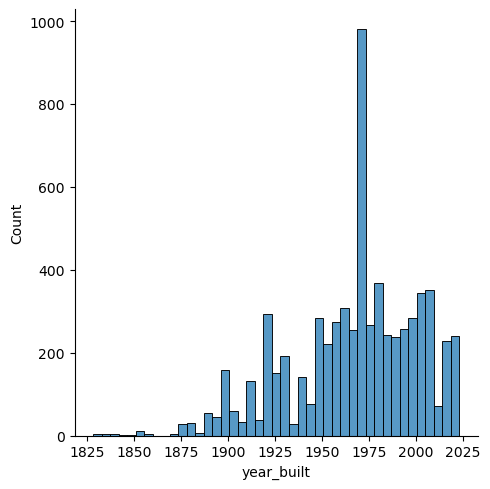

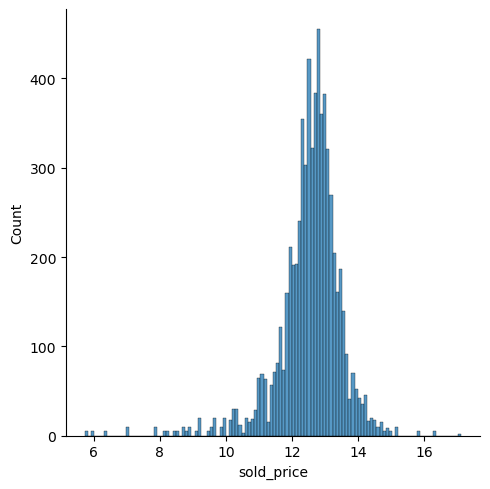

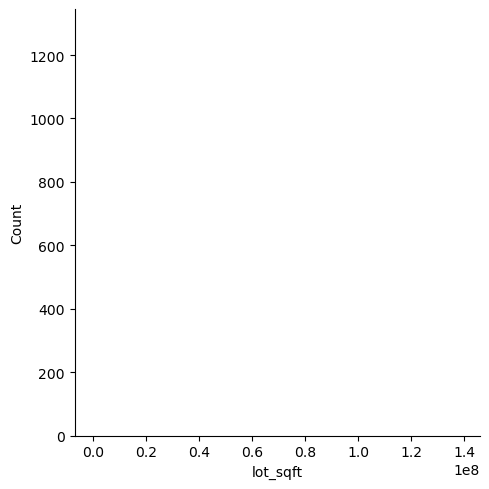

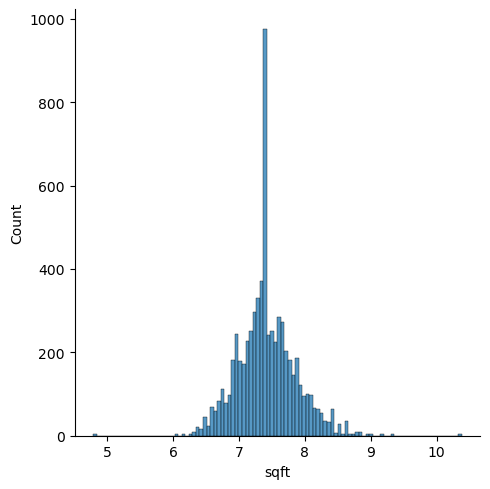

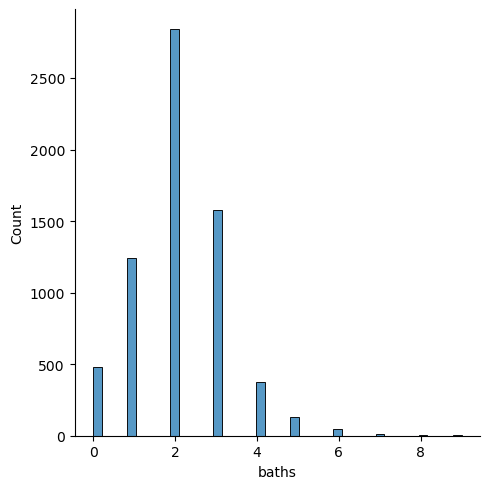

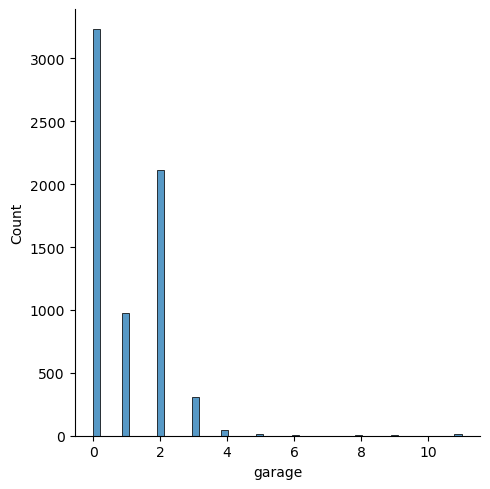

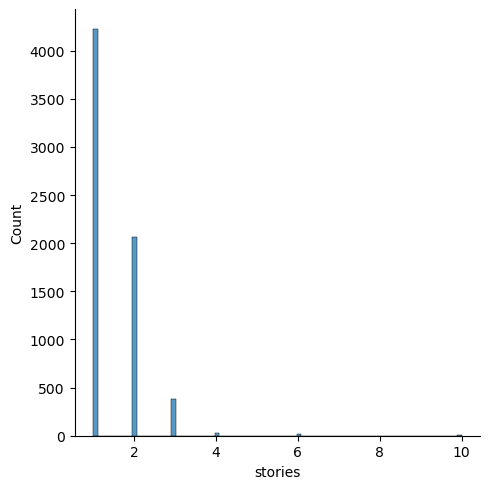

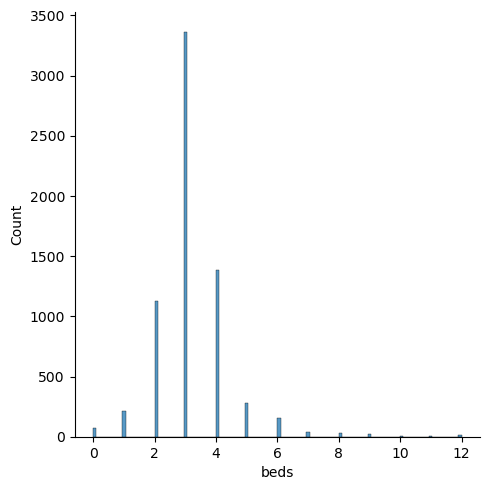

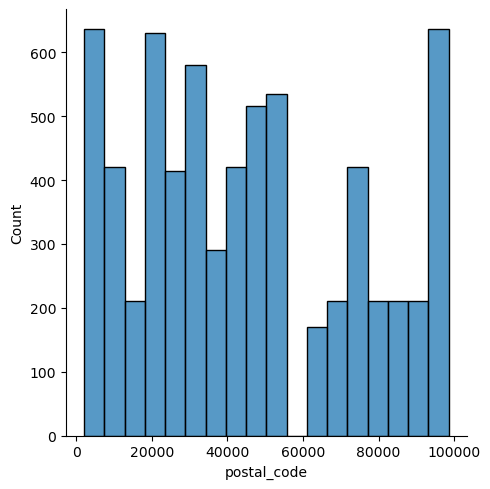

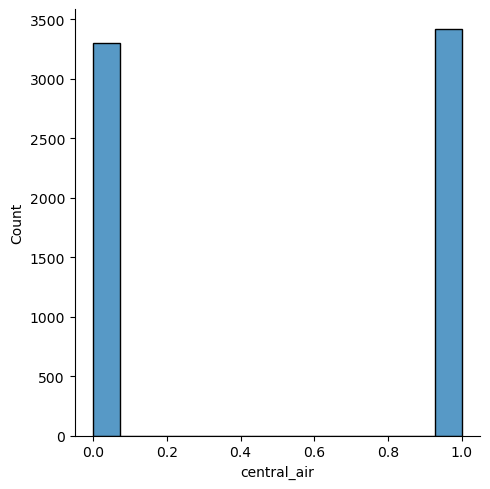

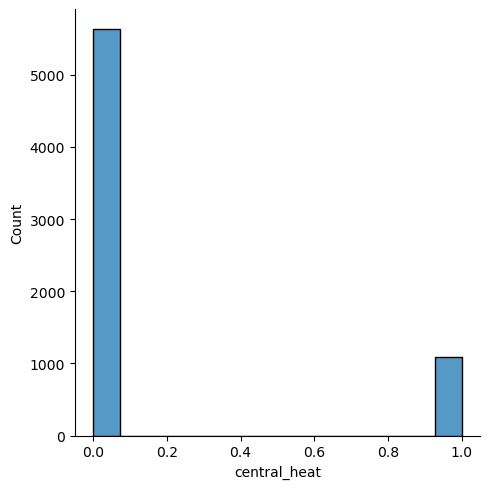

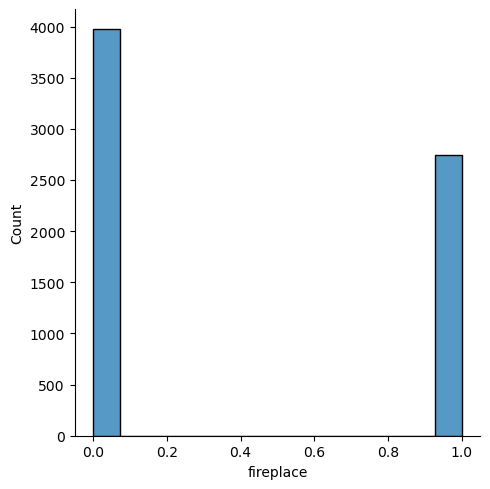

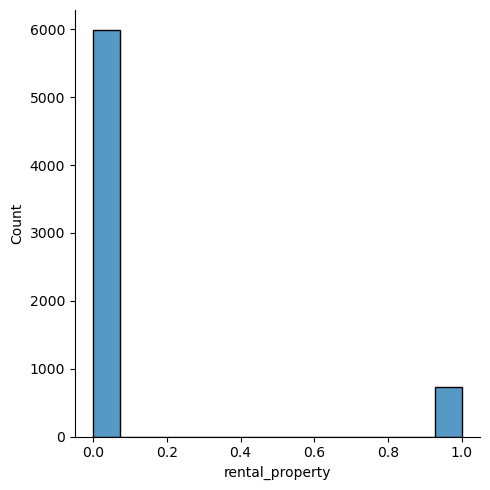

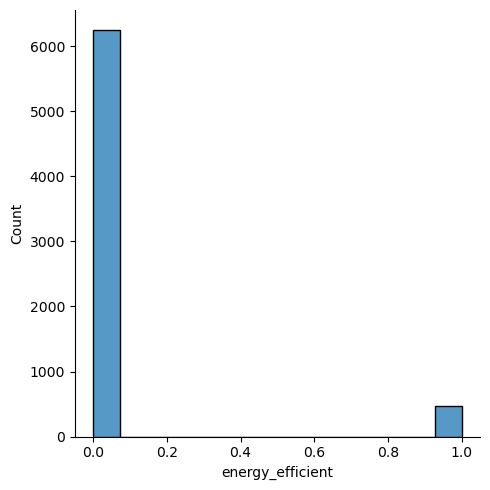

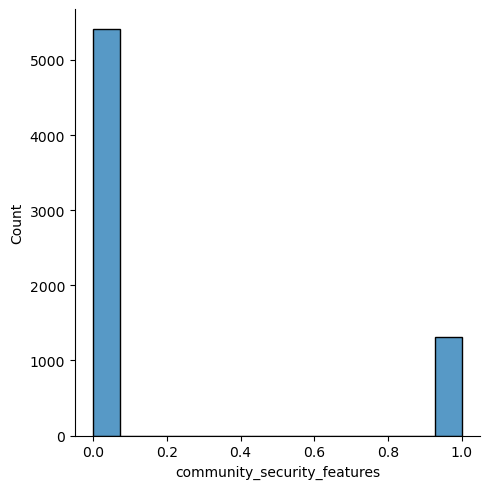

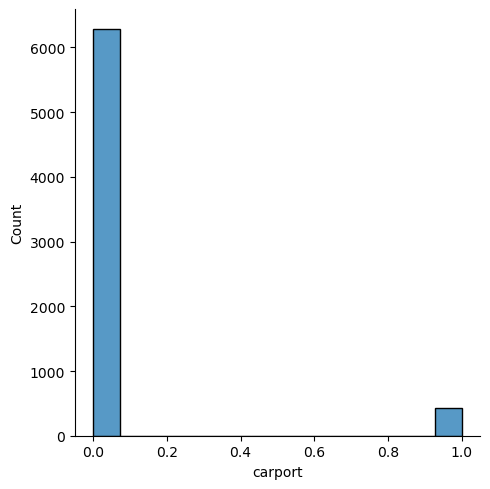

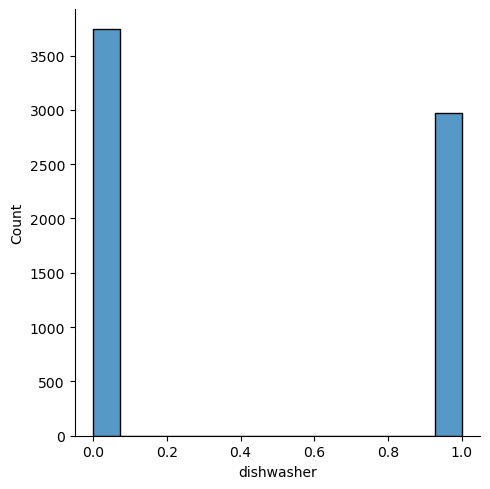

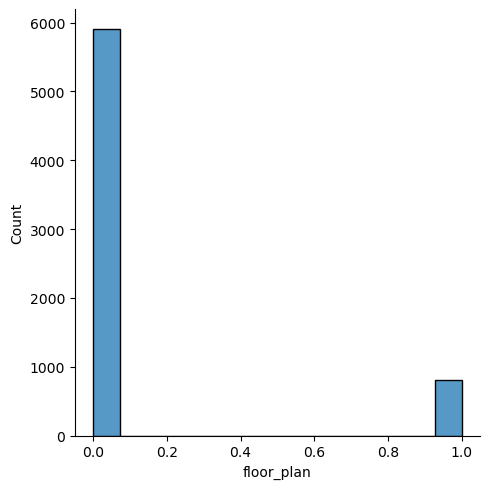

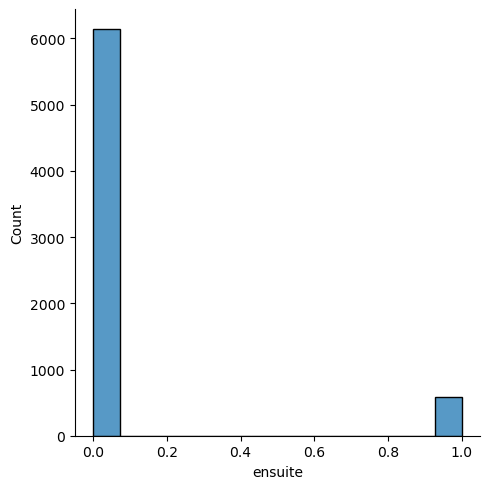

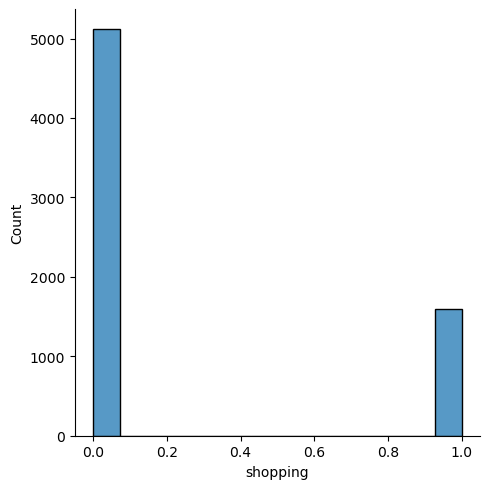

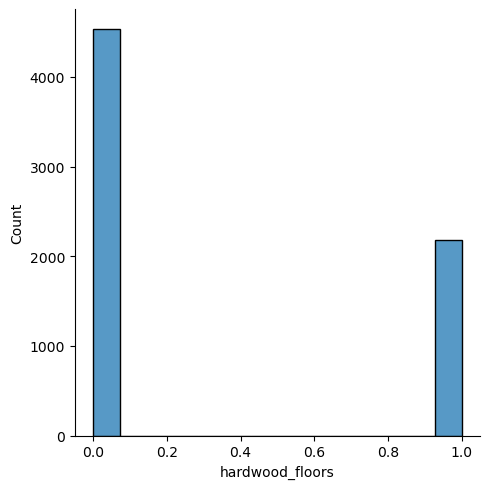

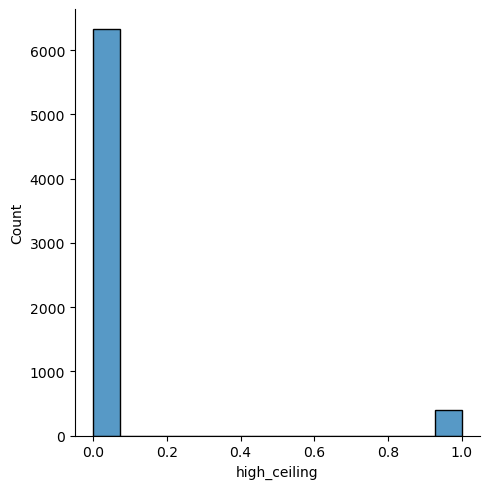

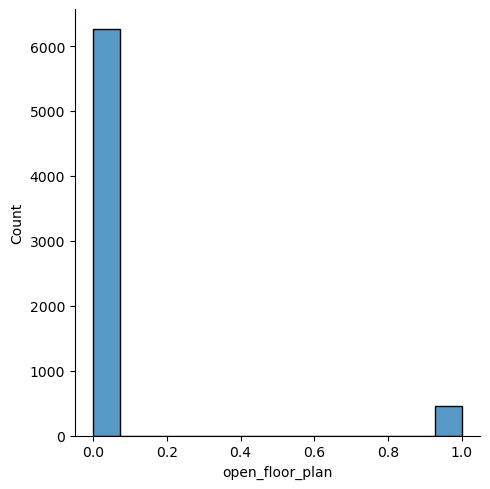

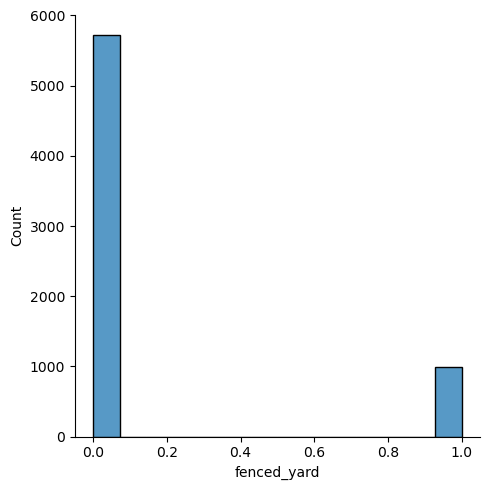

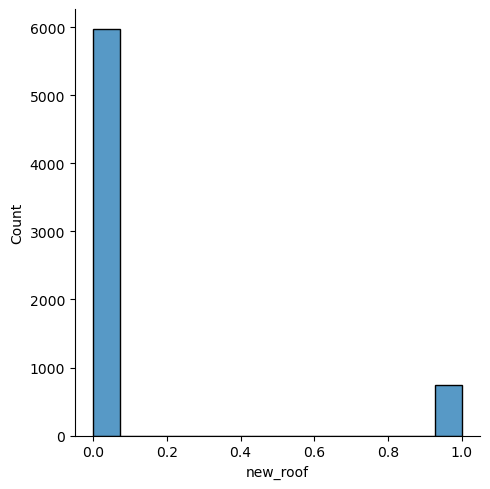

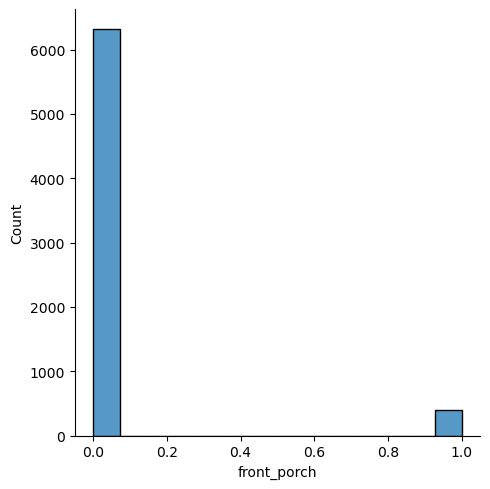

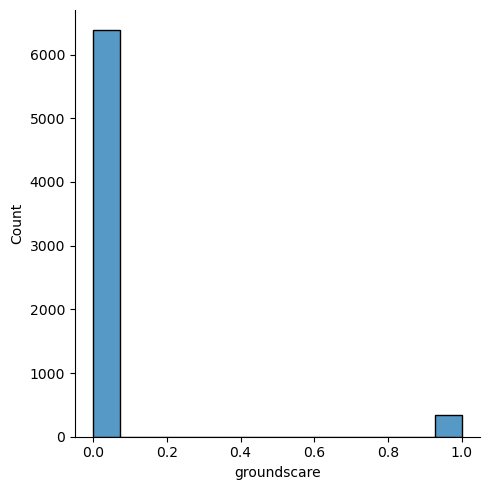

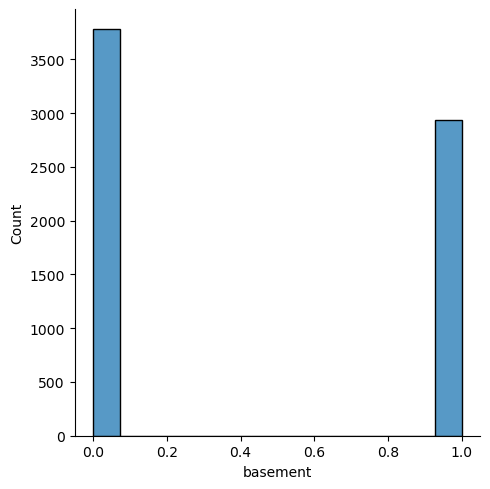

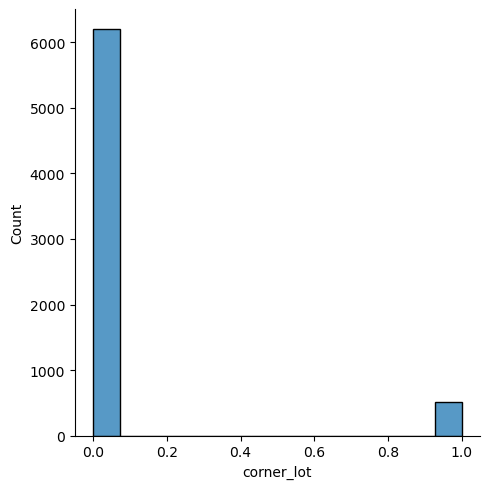

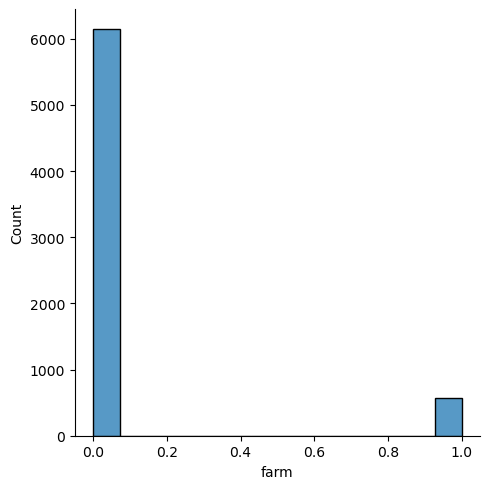

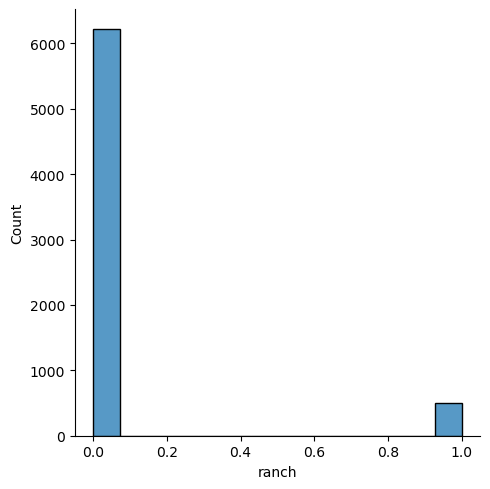

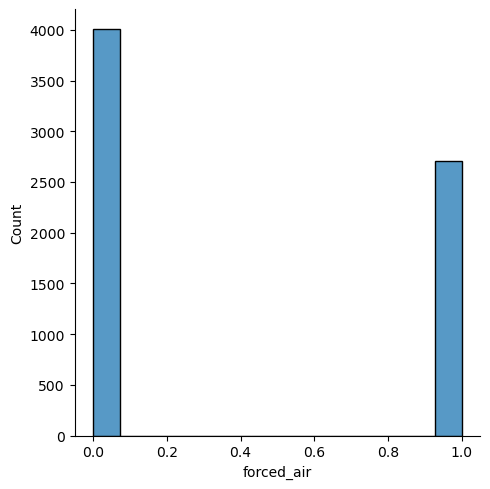

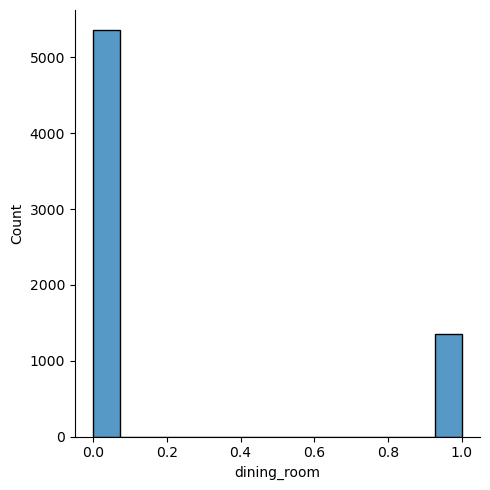

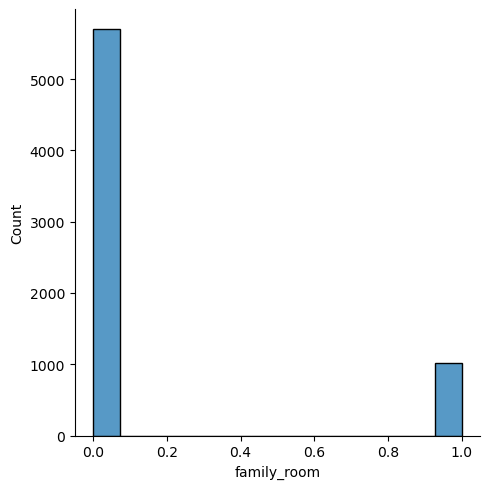

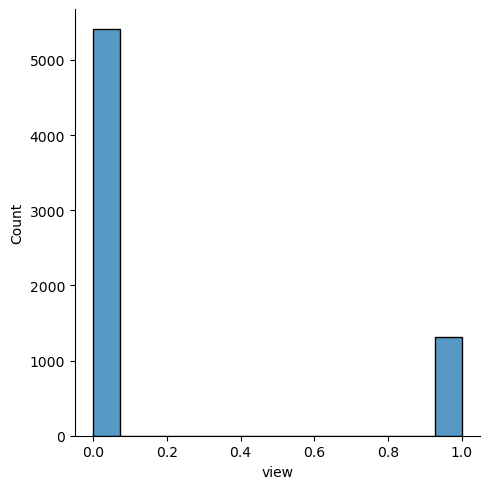

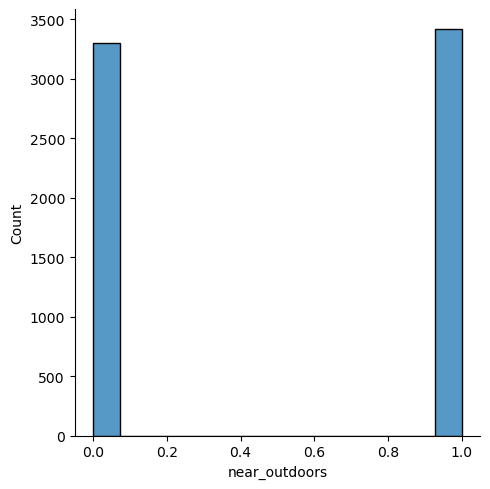

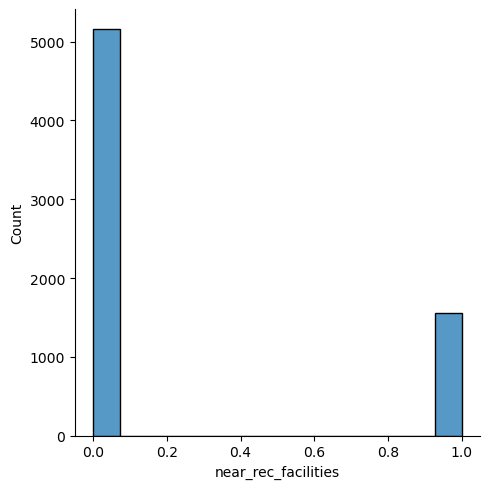

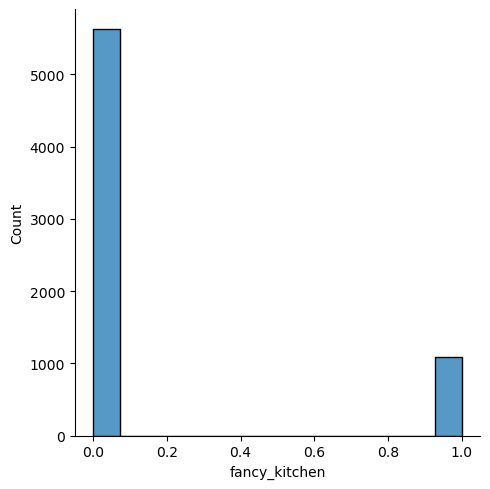

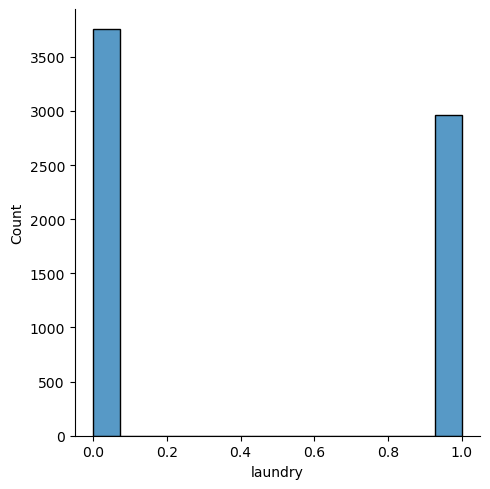

In [41]:
# By evaluating this distrubution, we can see that most of the columns are unevenly distrubuted. But that can't necessarily be attributed as outliers, since altering them might hugely affect the
# result. The only outliers considered were sold_price and sqft and those were normalized using logarithmic function
numbers = df.dtypes[df.dtypes != 'object'].index.tolist()

#we can plot all numeric columns for easy visualization
for column in numbers: 
    sns.displot(df[column])

In [36]:
#Before transforming anything, let's plot each variable on a line-chart in relation to sold_price
sold_price = df['sold_price']
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('sold_price')

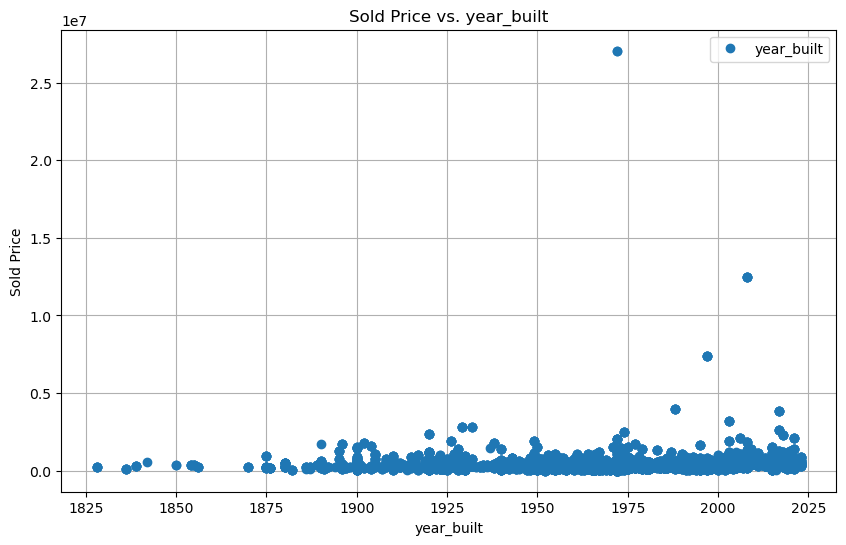

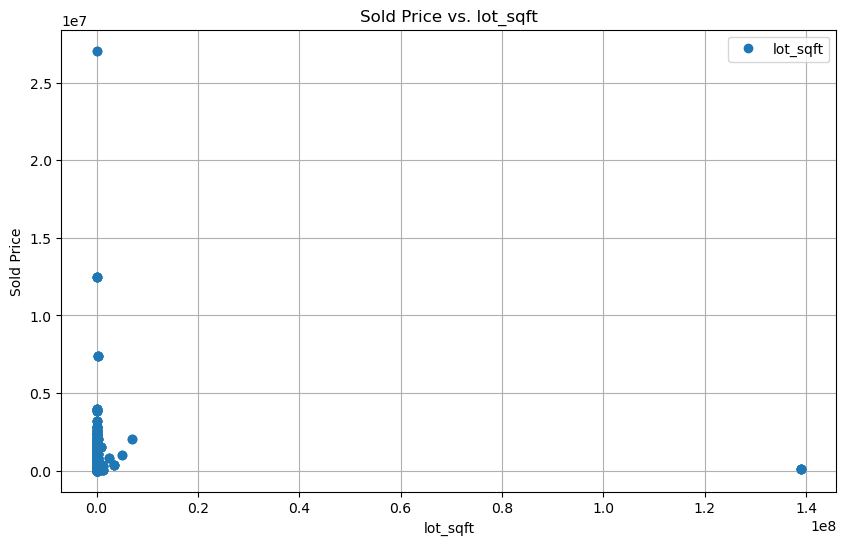

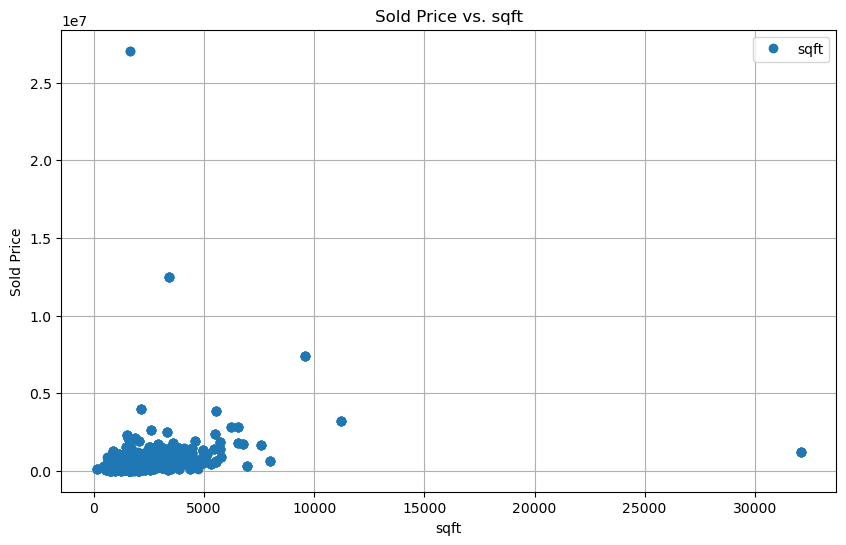

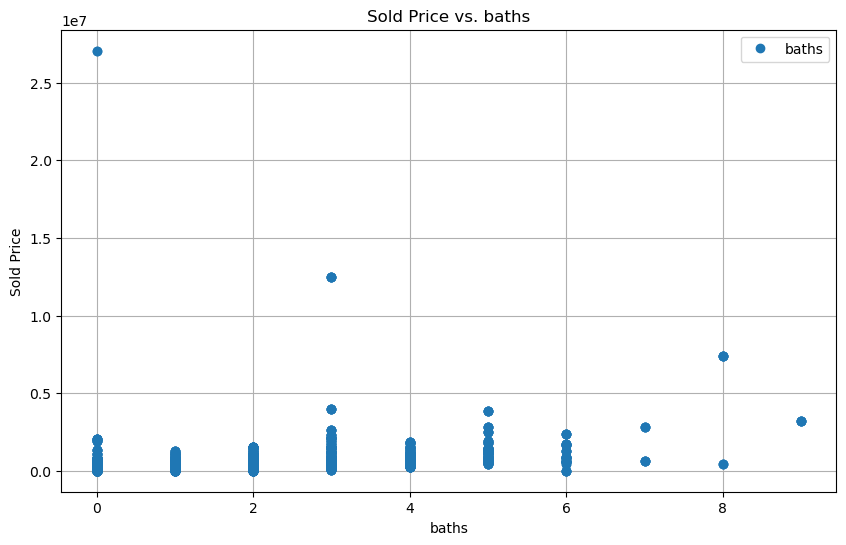

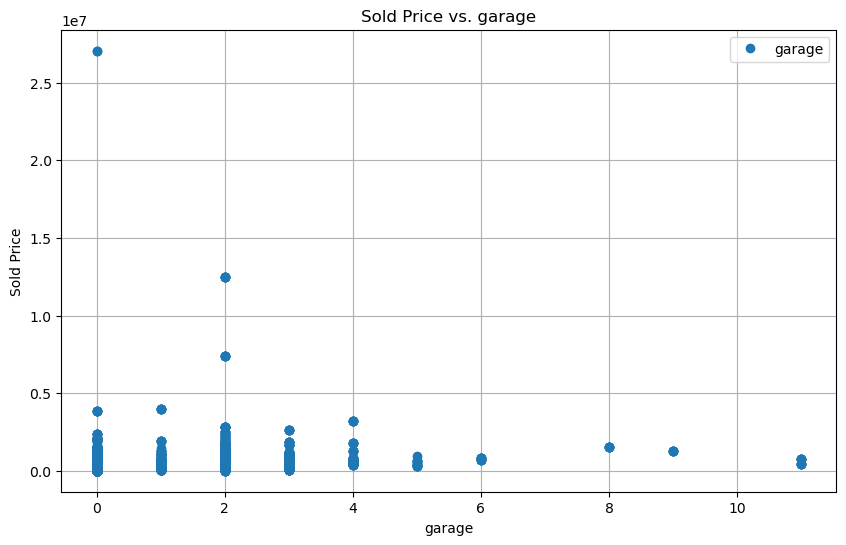

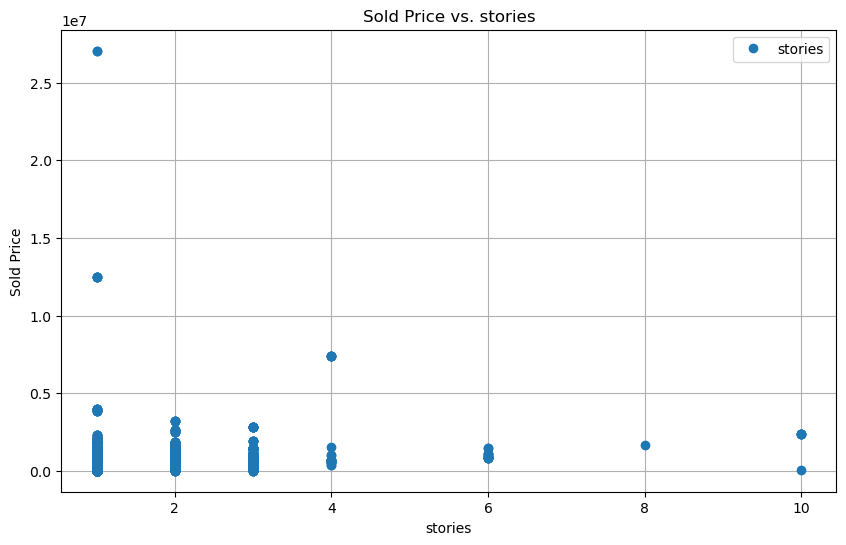

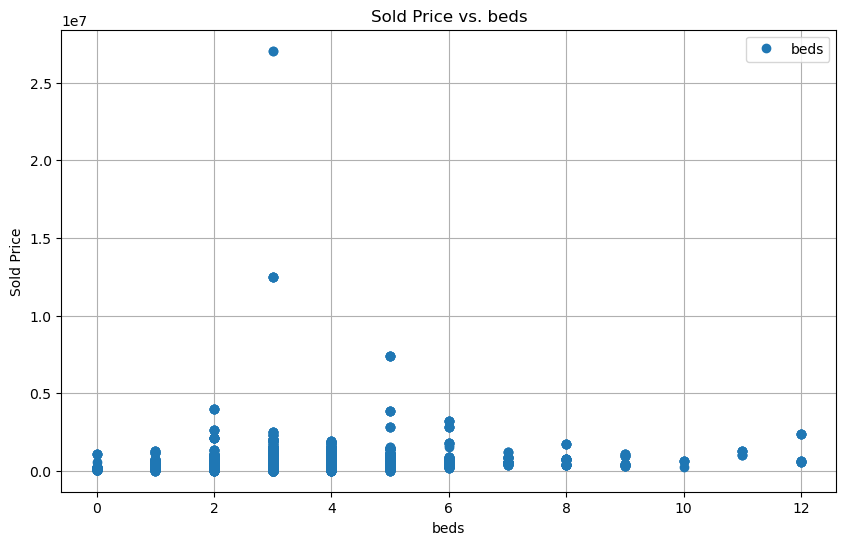

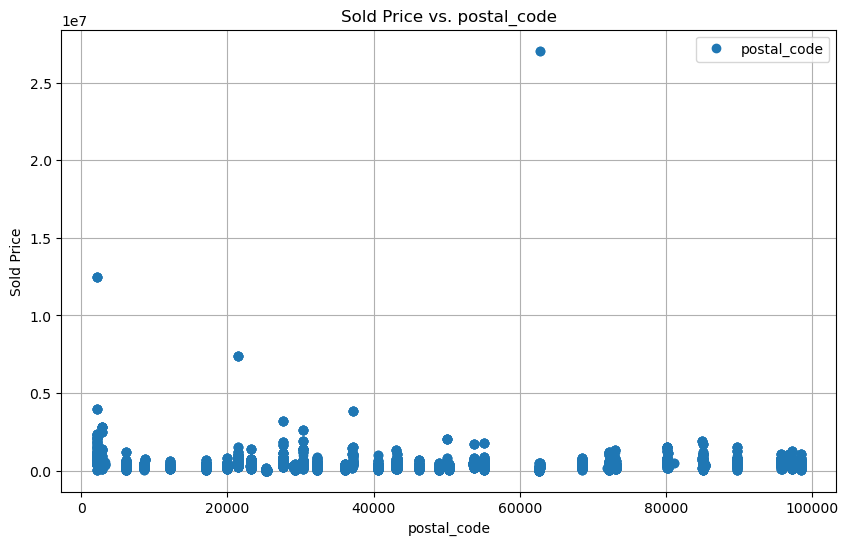

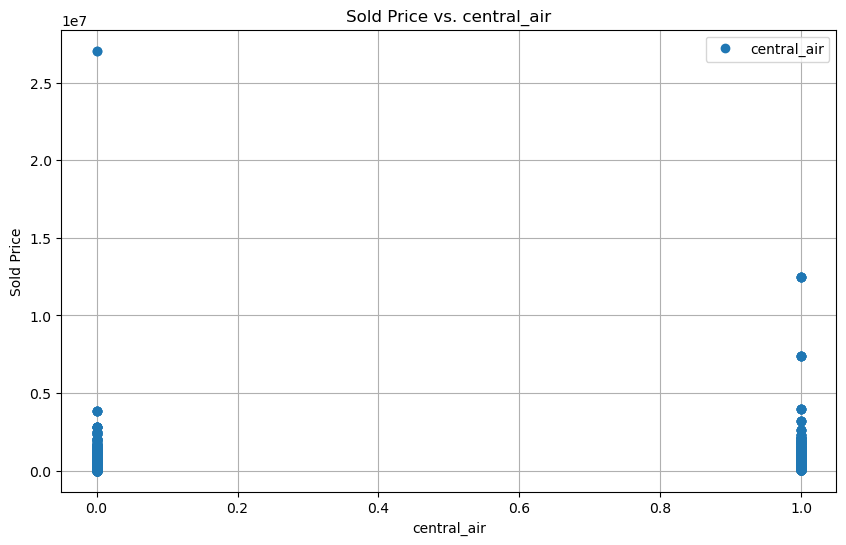

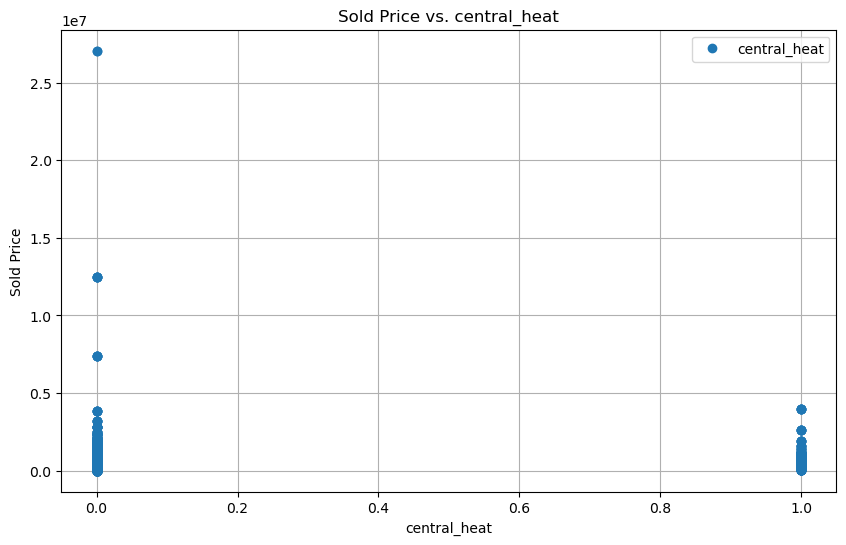

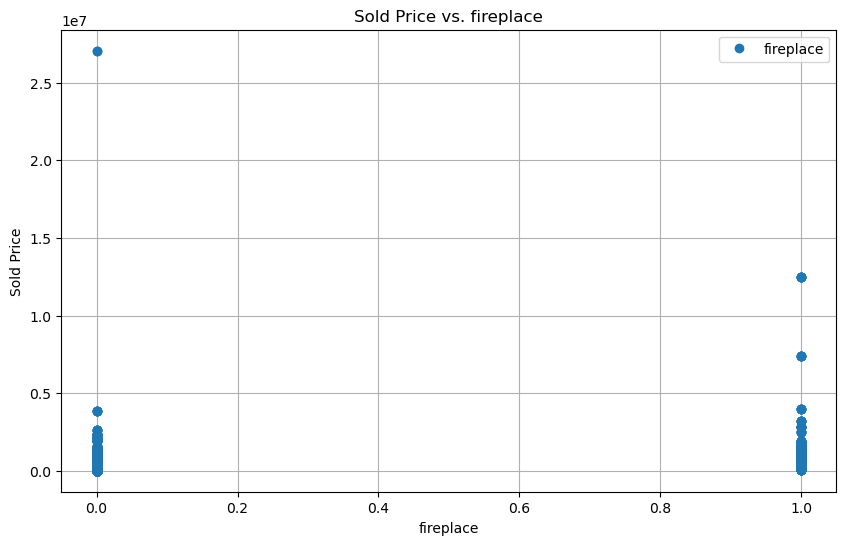

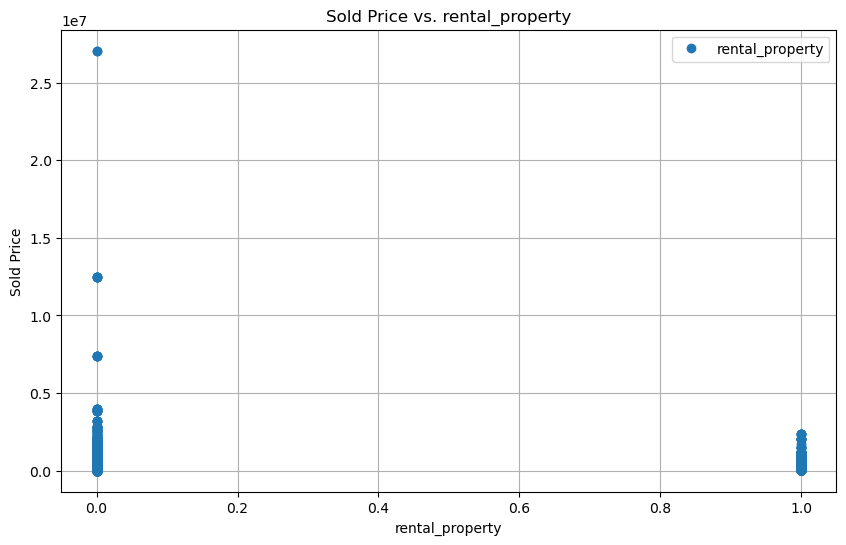

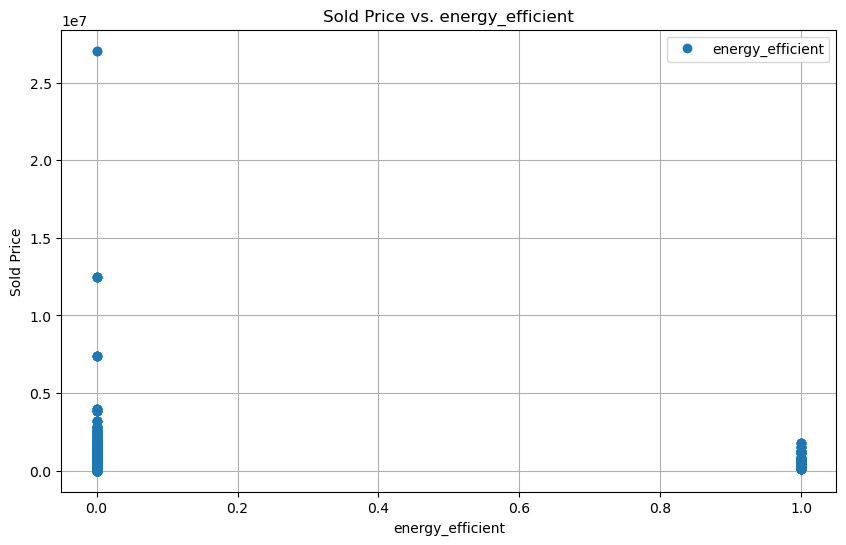

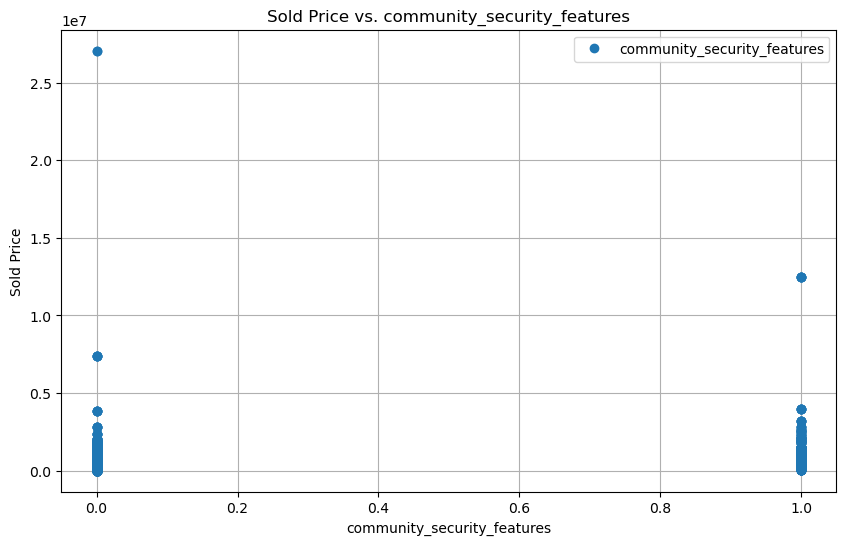

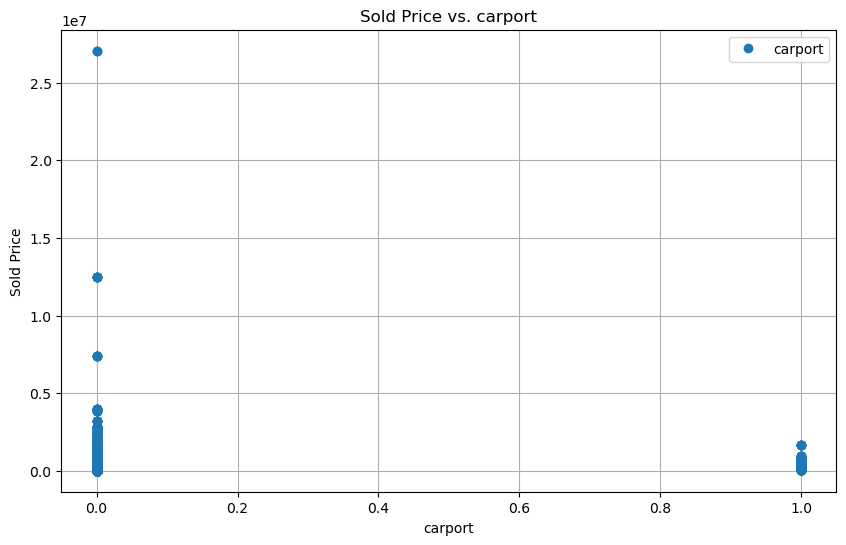

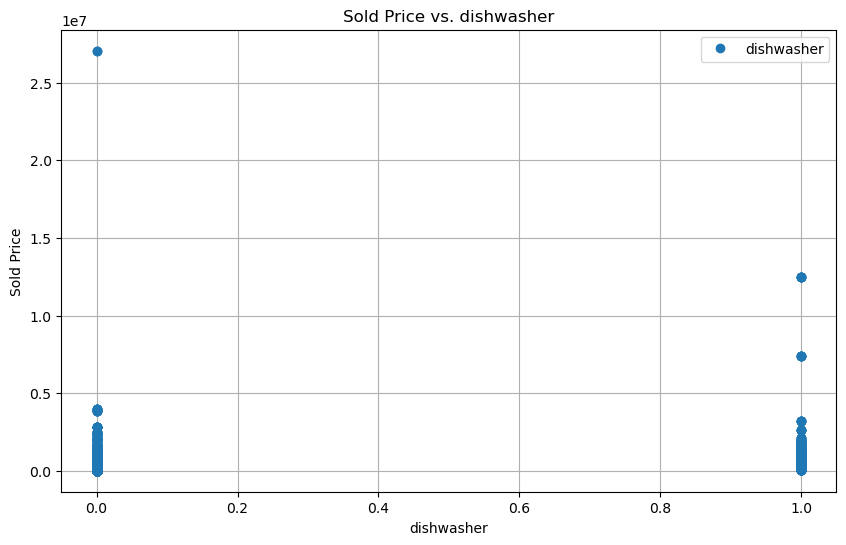

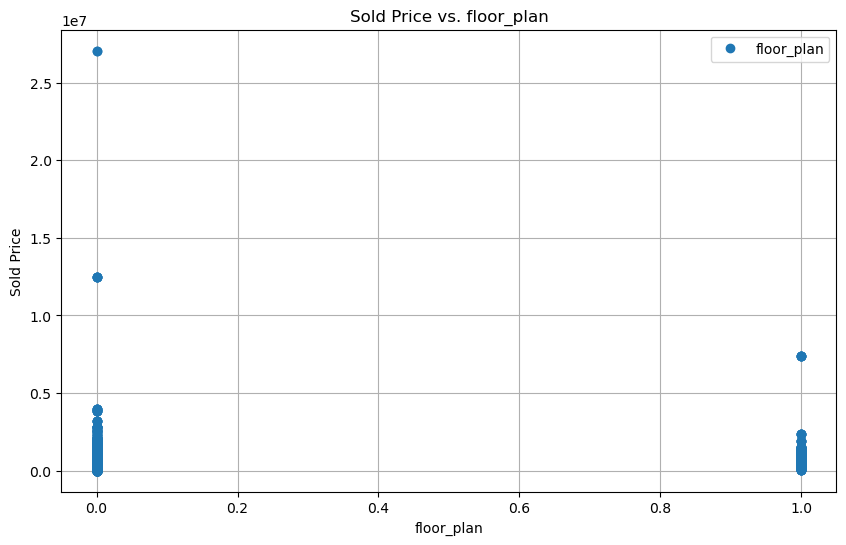

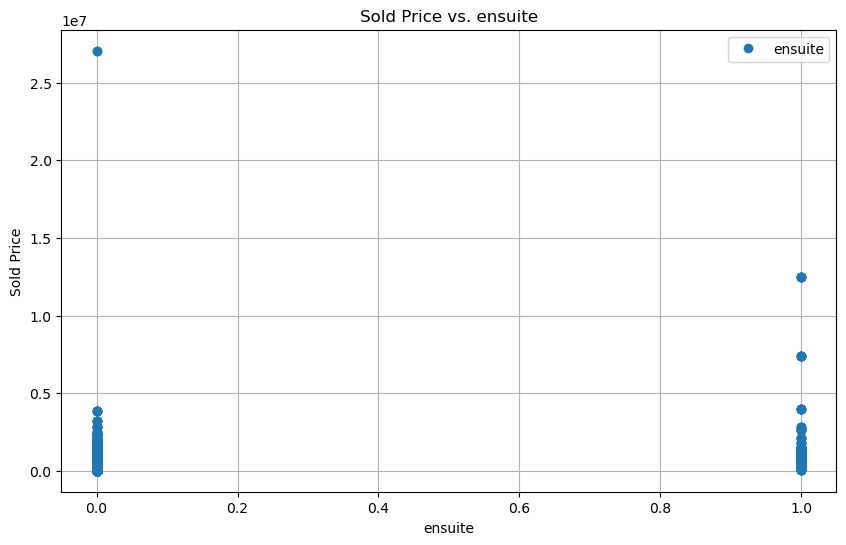

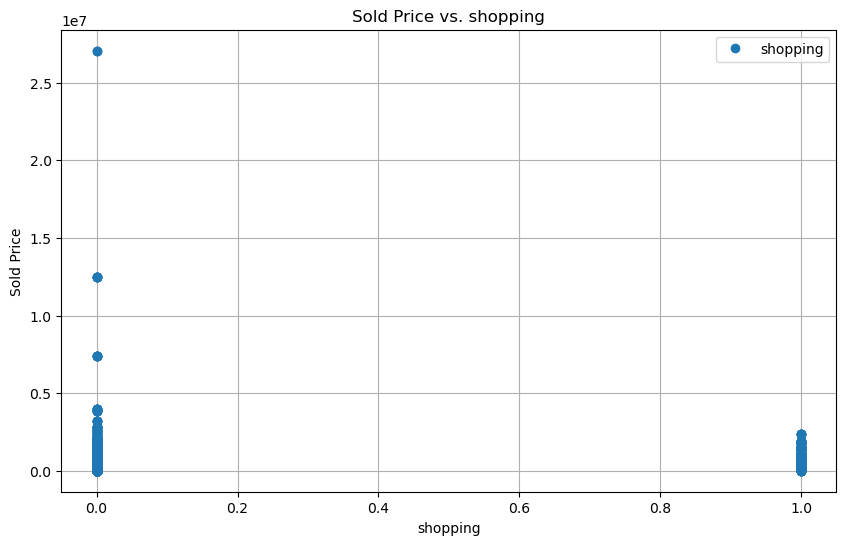

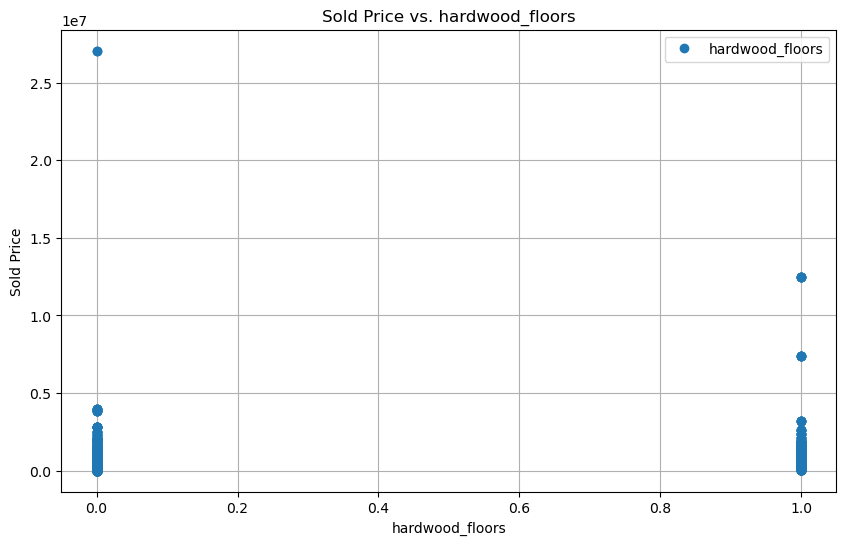

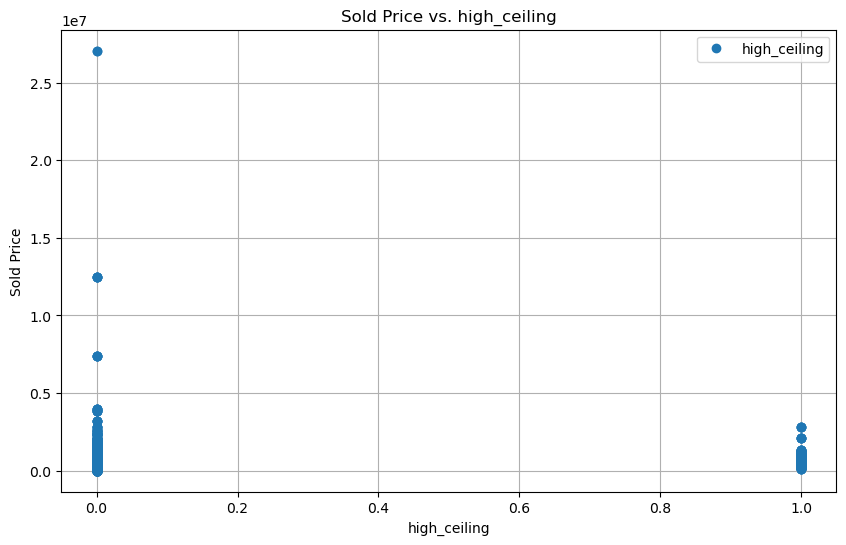

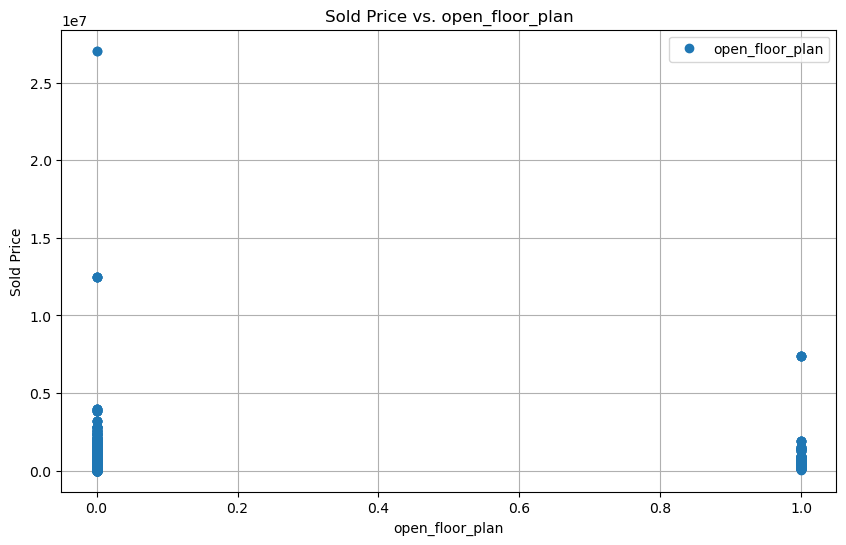

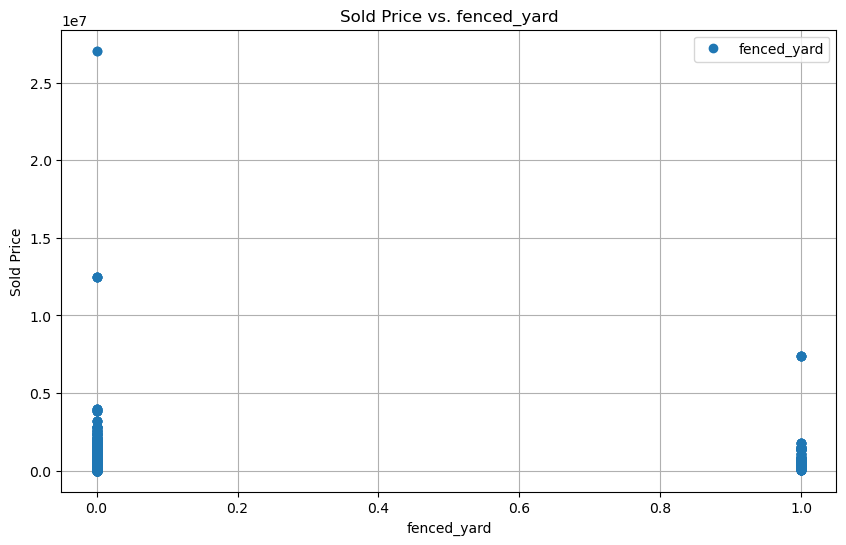

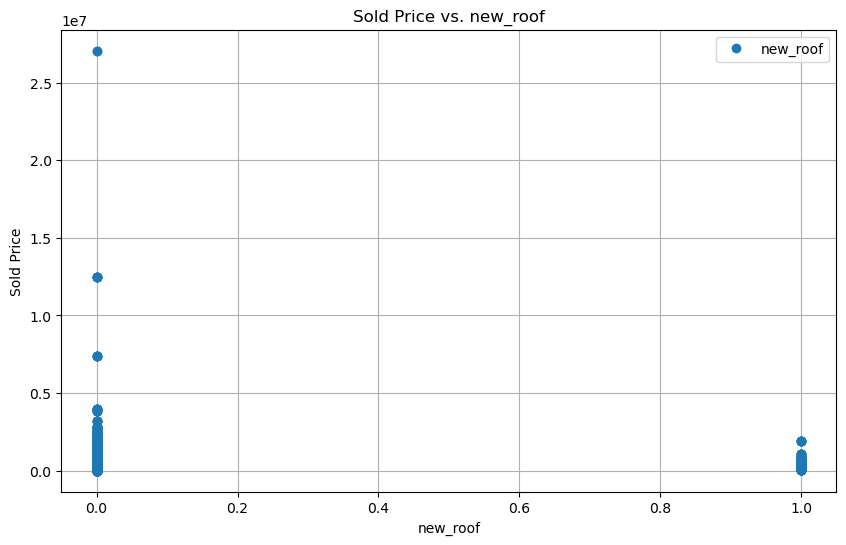

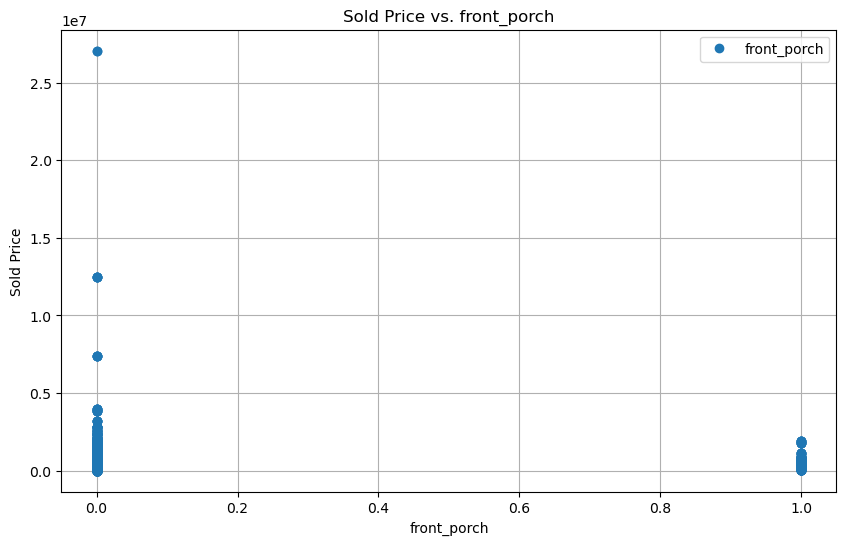

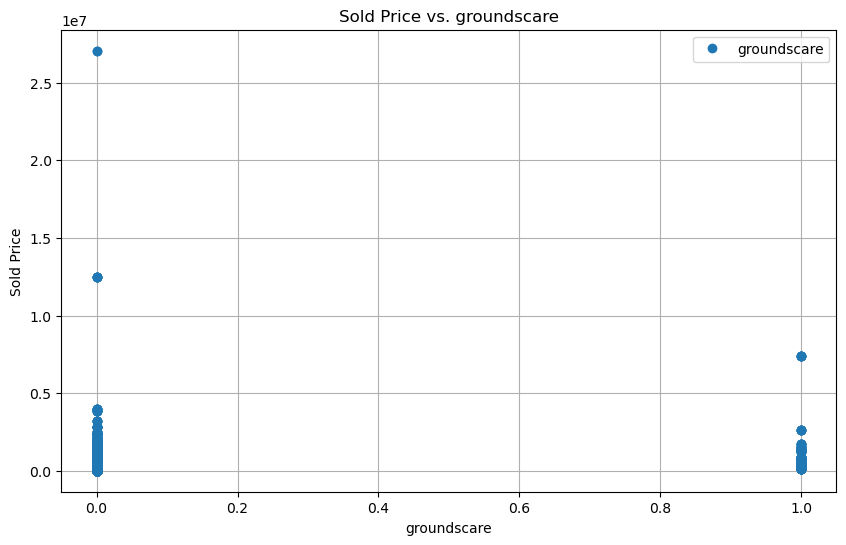

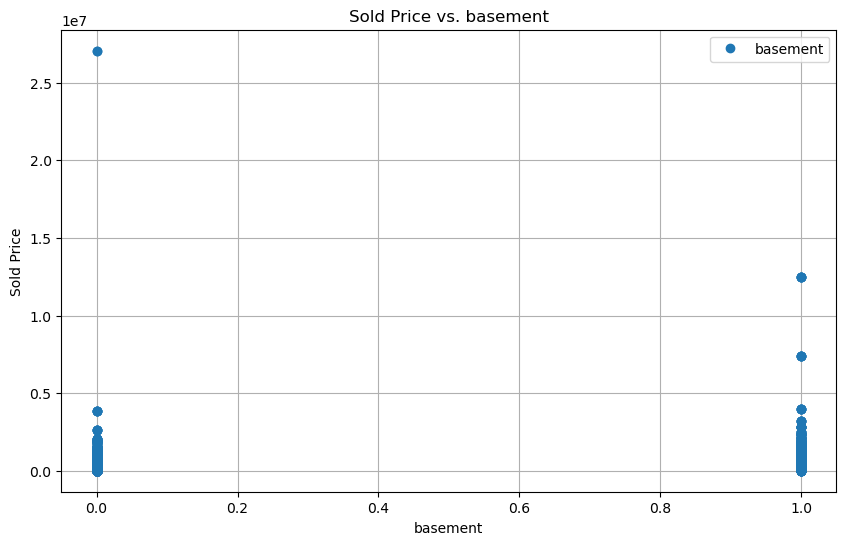

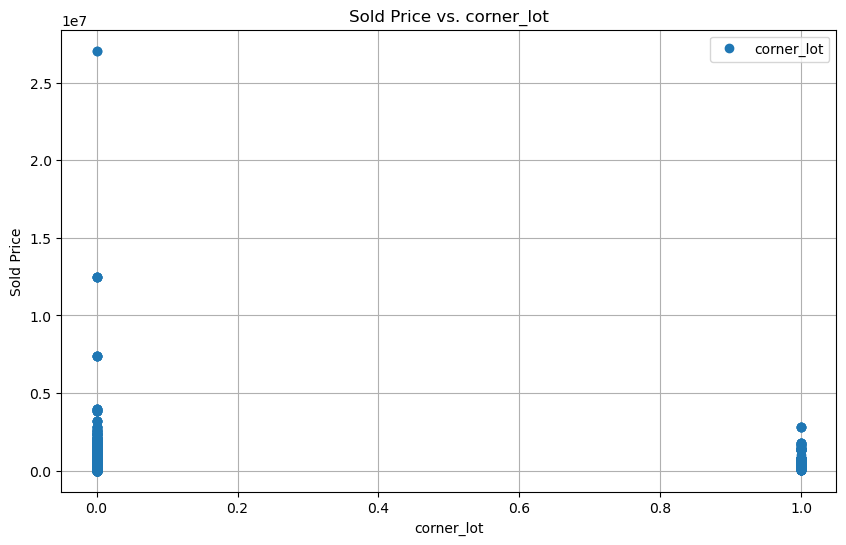

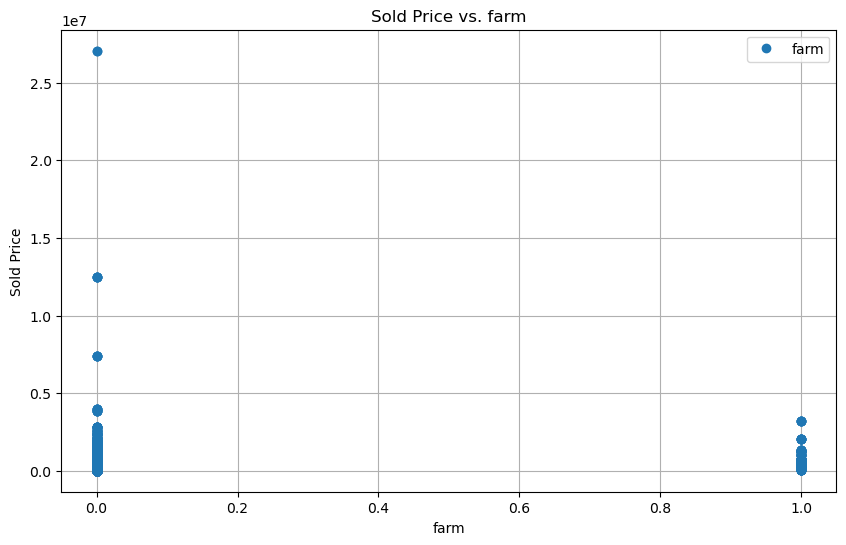

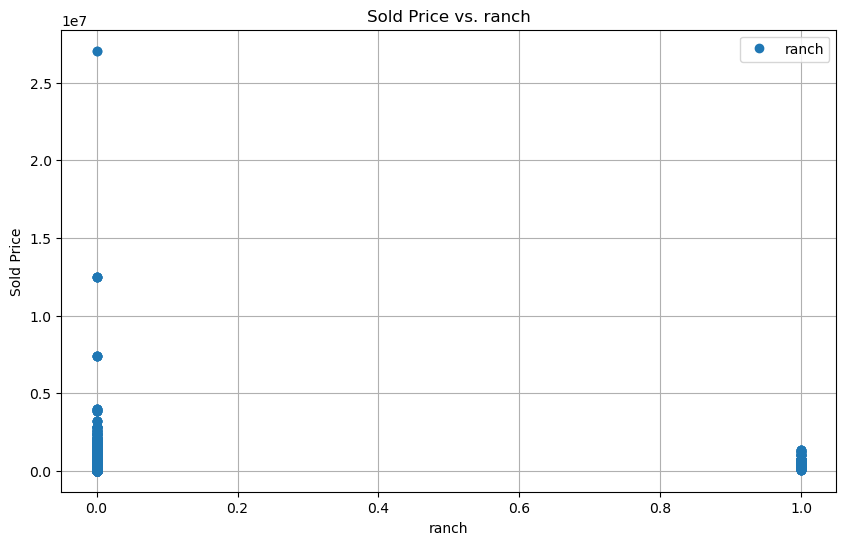

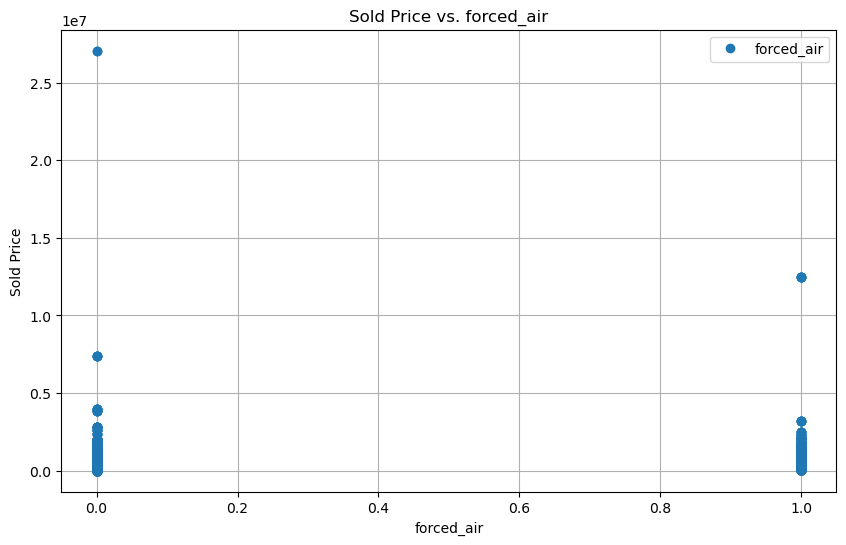

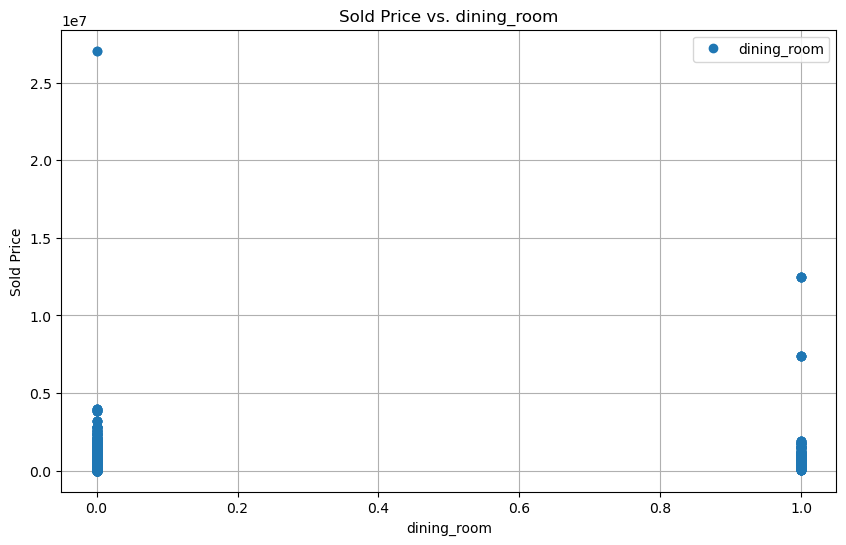

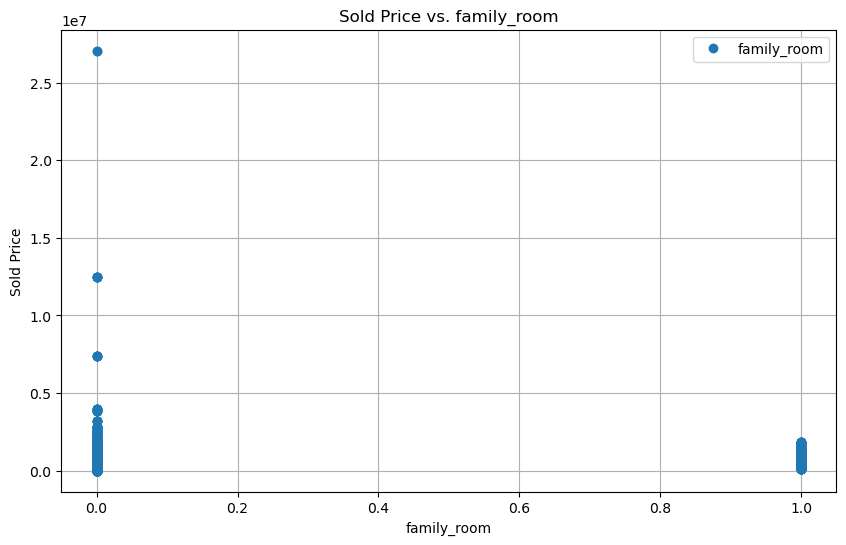

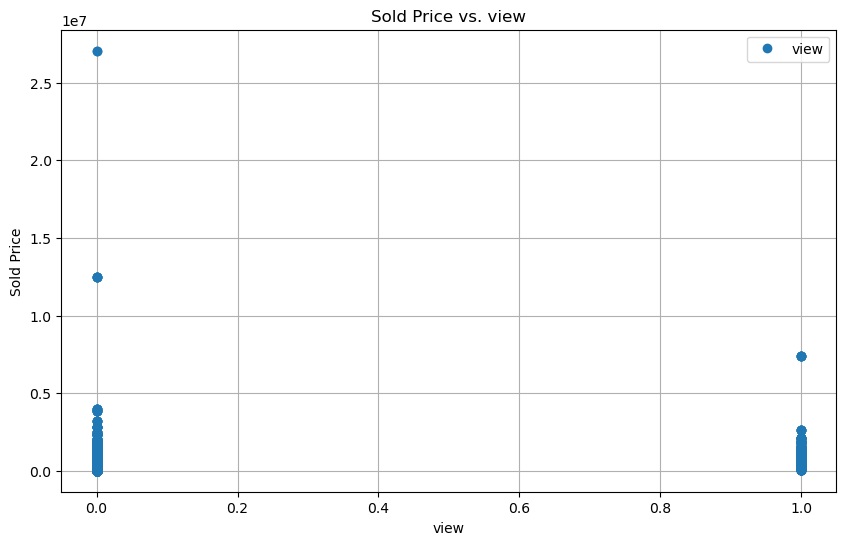

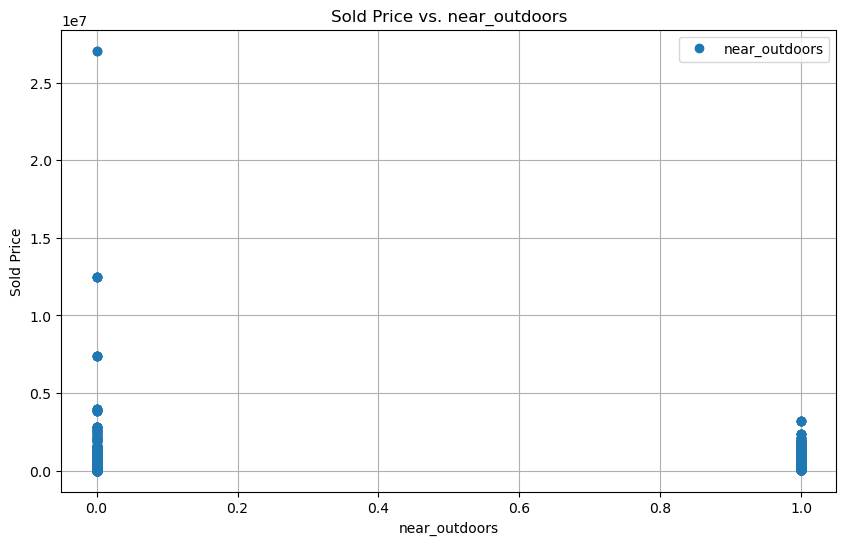

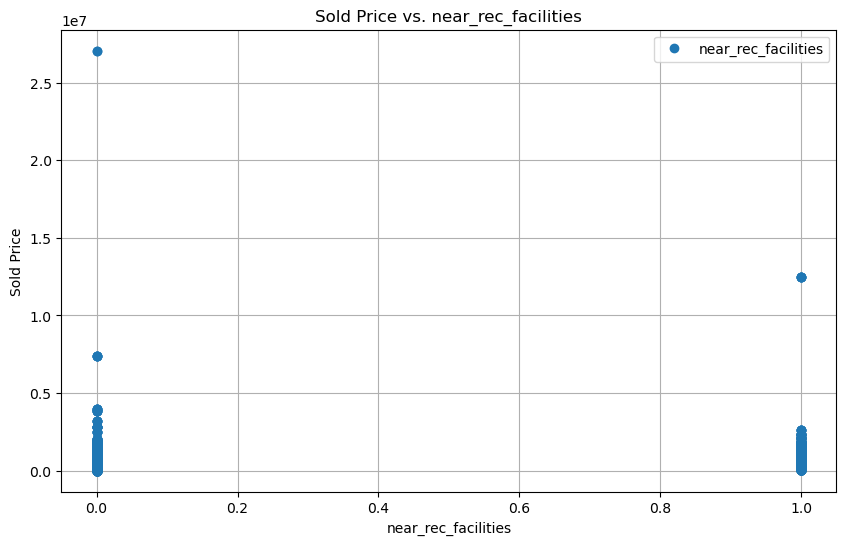

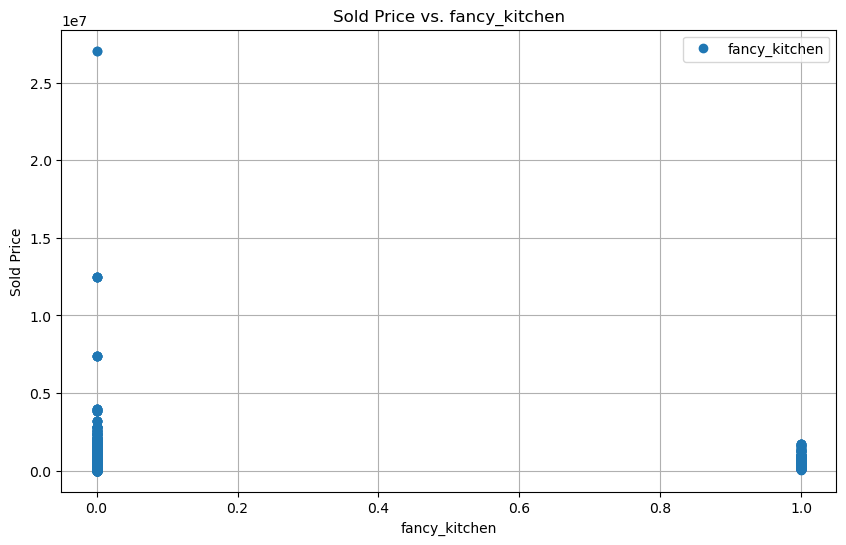

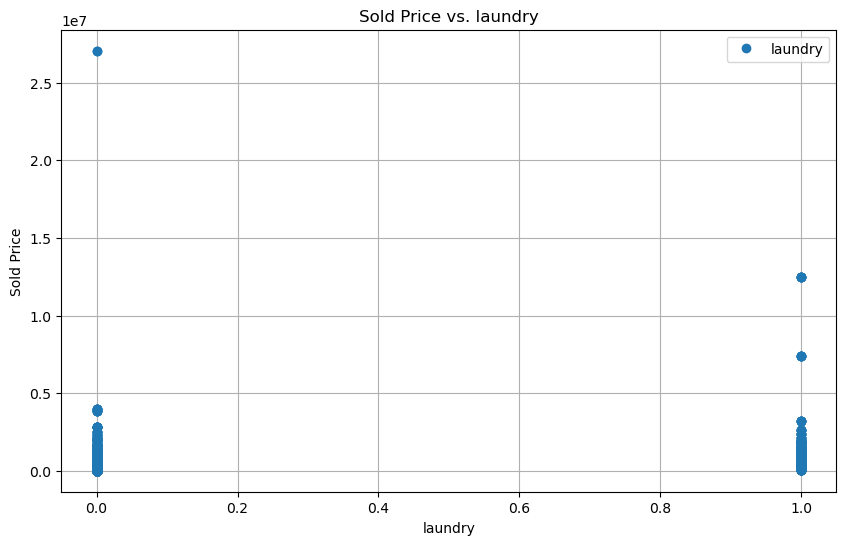

In [37]:
#looping through the numeric columns to create a line chart
for column in numeric_columns: 
    x_data = df[column]

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, sold_price, marker='o', linestyle='', label=f'{column}')
    plt.title(f'Sold Price vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Sold Price')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


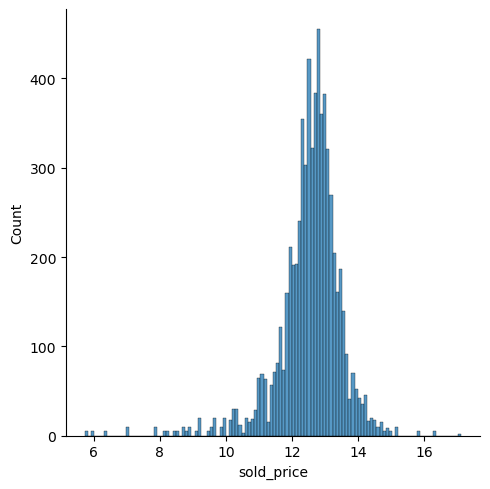

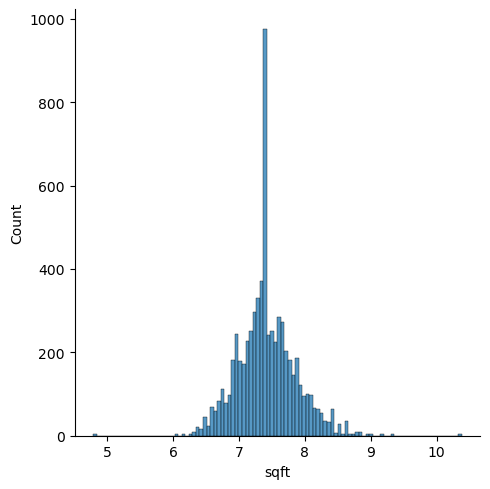

In [38]:
#let's transform skewed sold_price and sqft using log transformatin
df["sold_price"] = df["sold_price"].apply(np.log)
sns.displot(df["sold_price"])

df["sqft"] = df["sqft"].apply(np.log)
sns.displot(df["sqft"])

In [39]:
#After transforming, let's plot each variable on a line-chart in relation to sold_price
sold_price = df['sold_price']
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('sold_price')

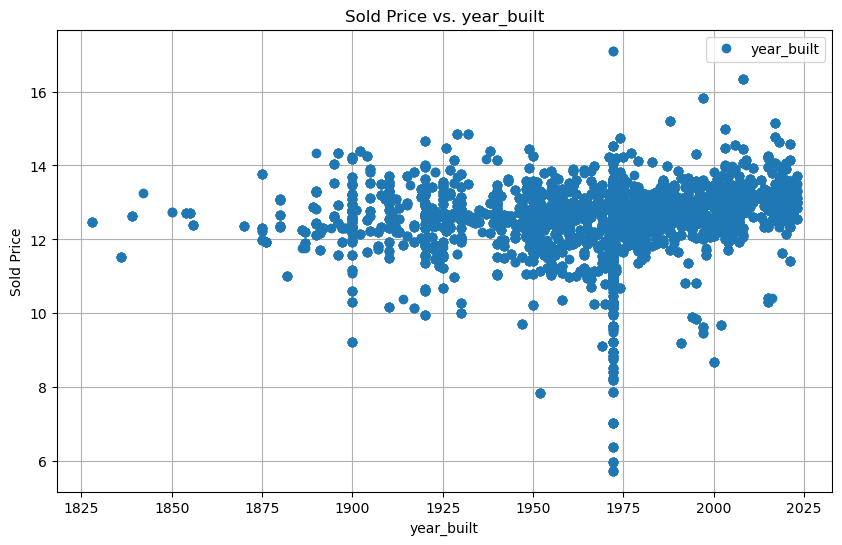

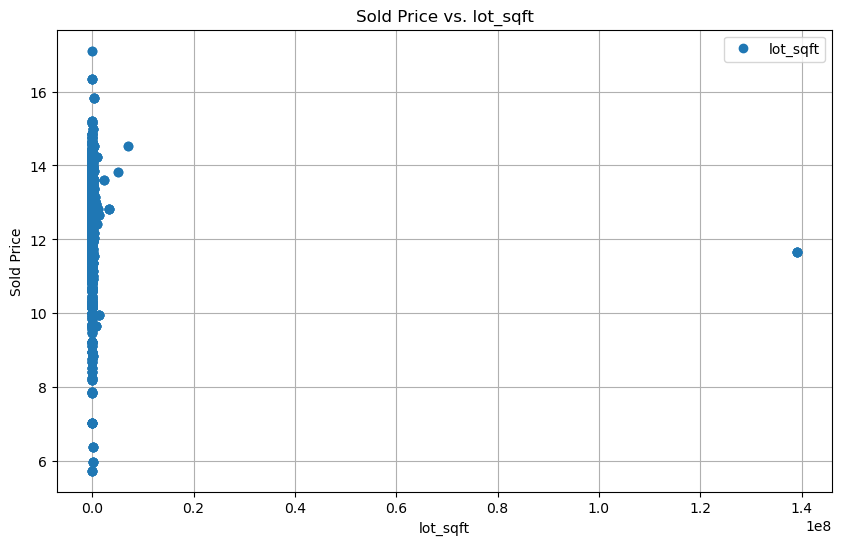

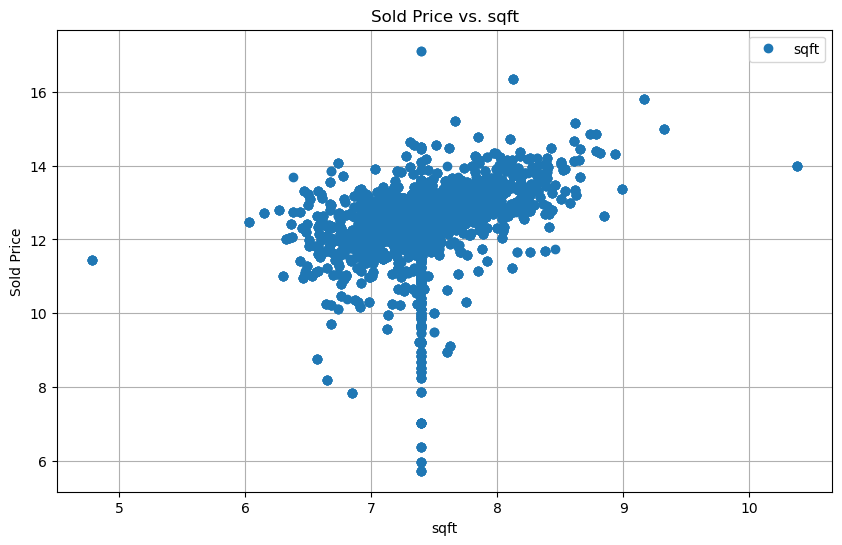

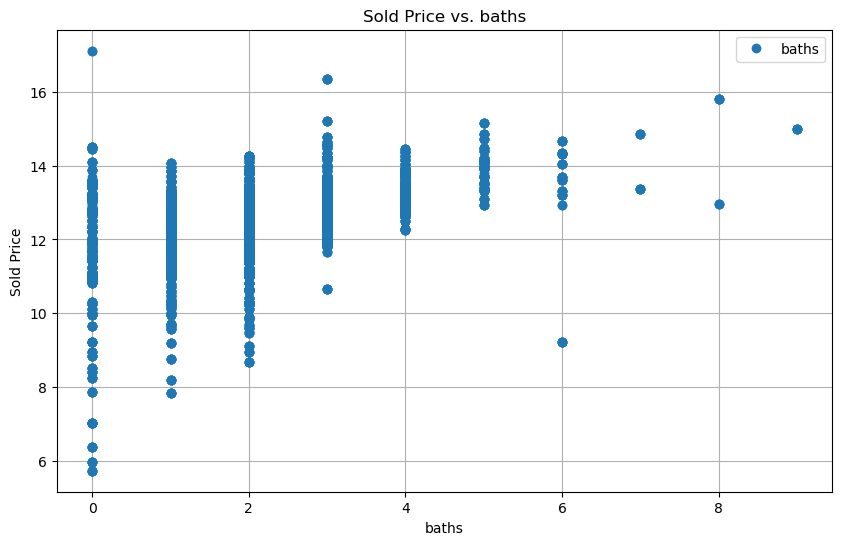

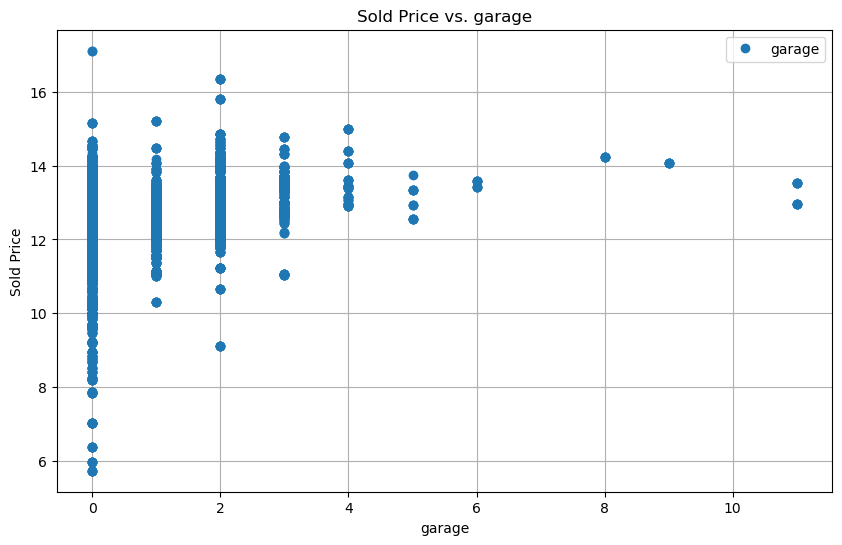

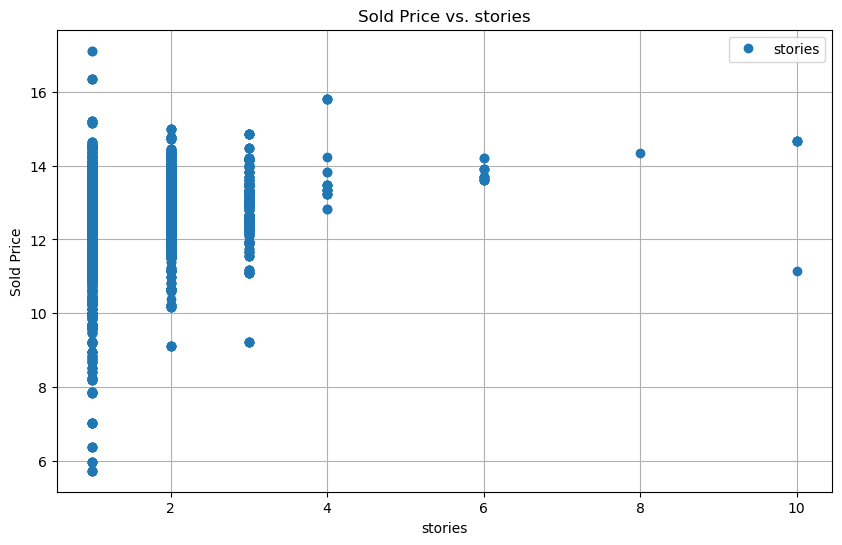

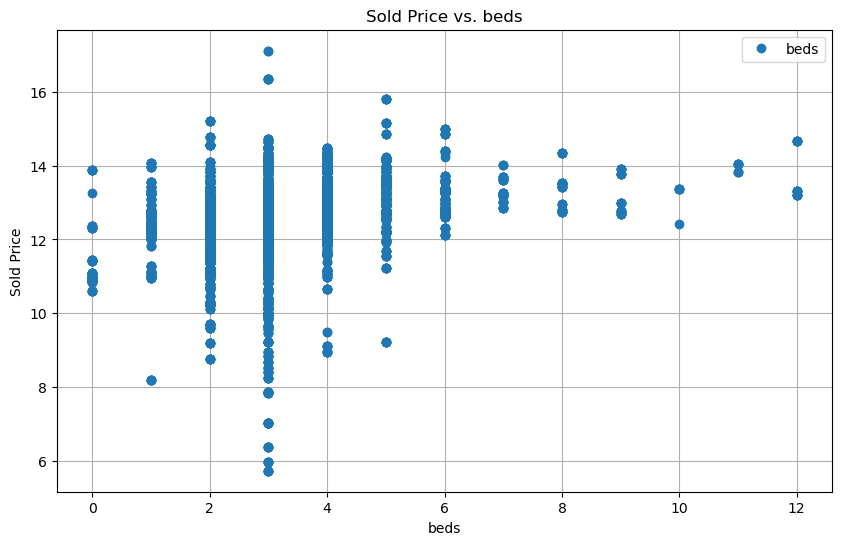

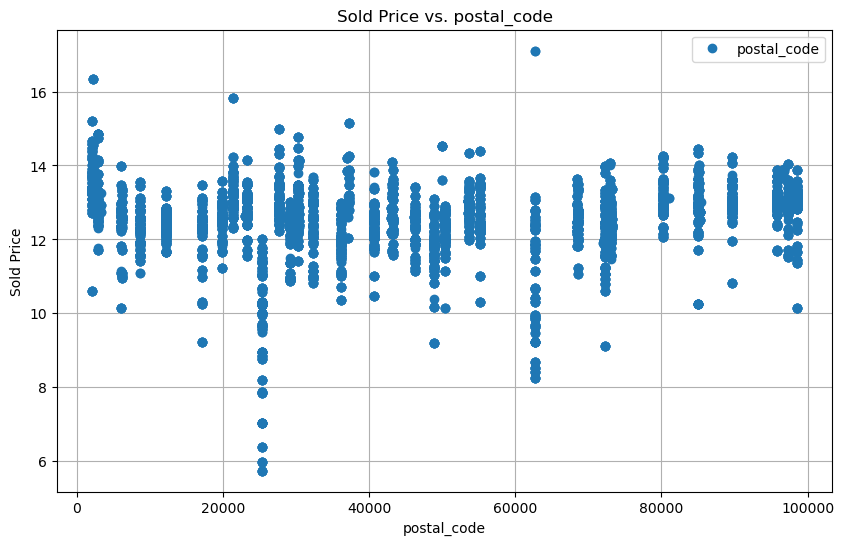

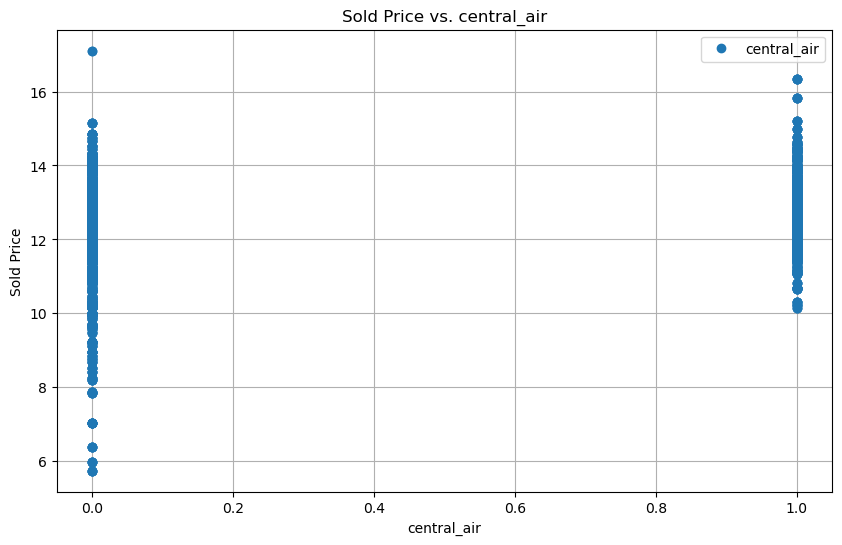

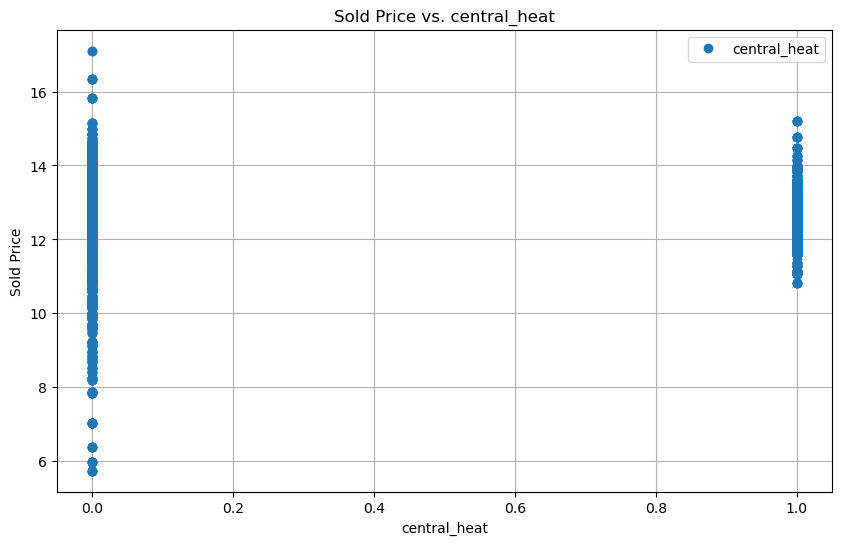

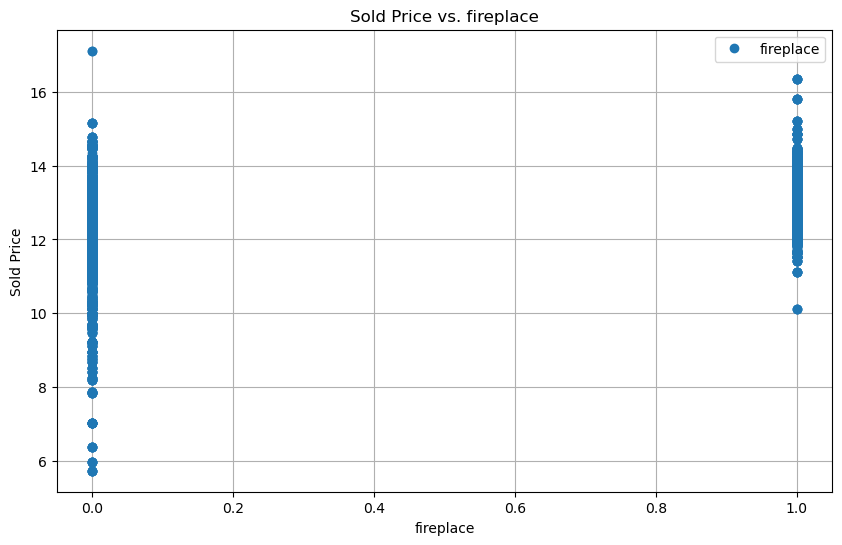

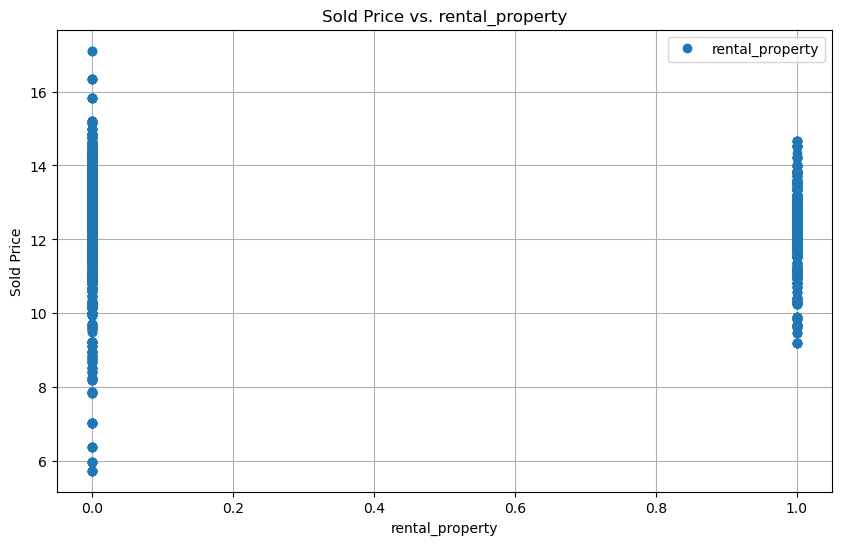

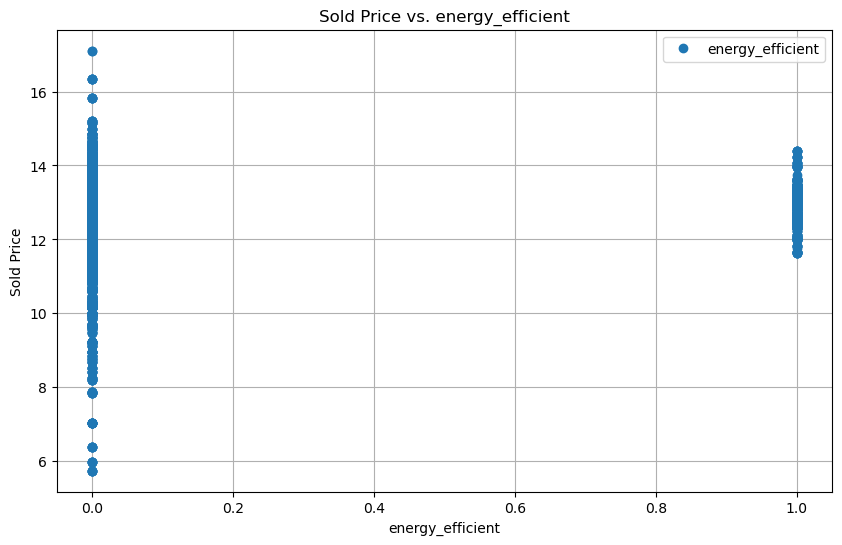

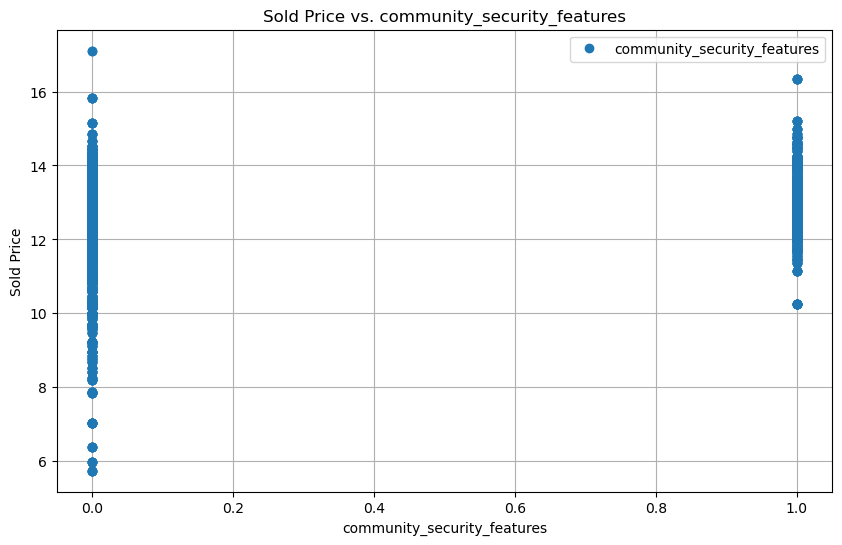

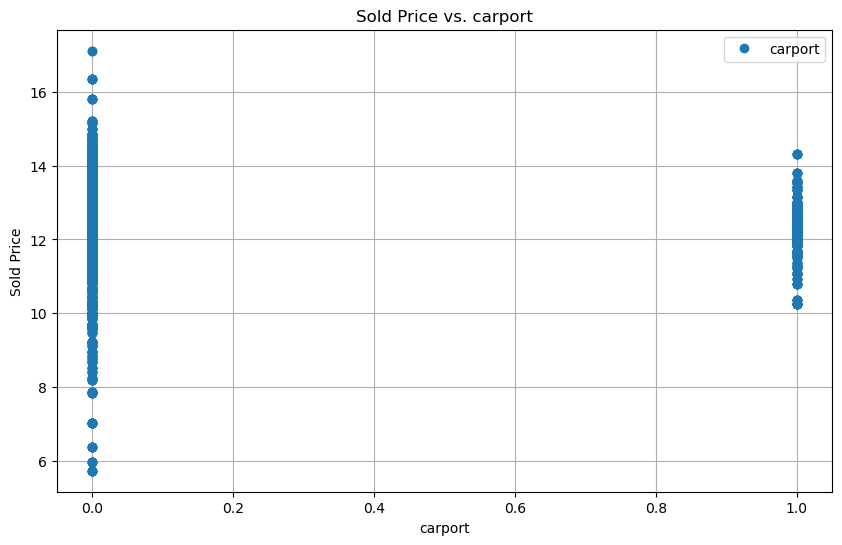

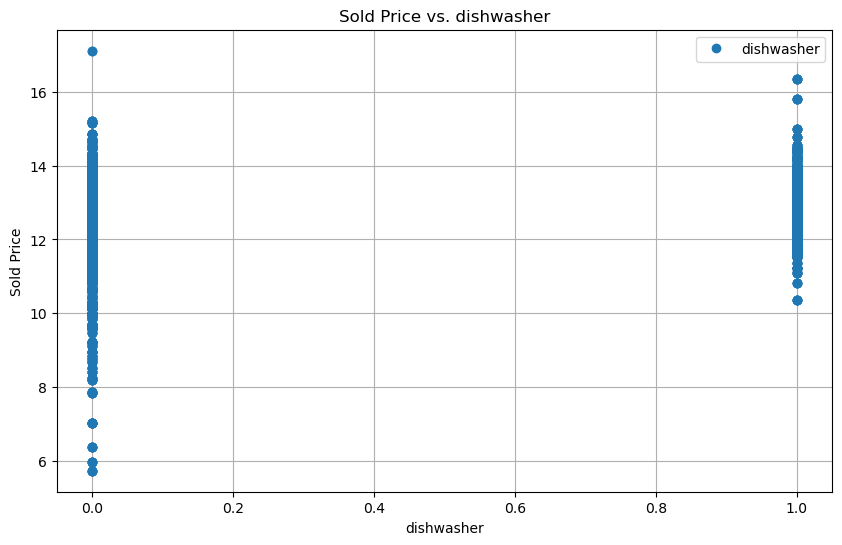

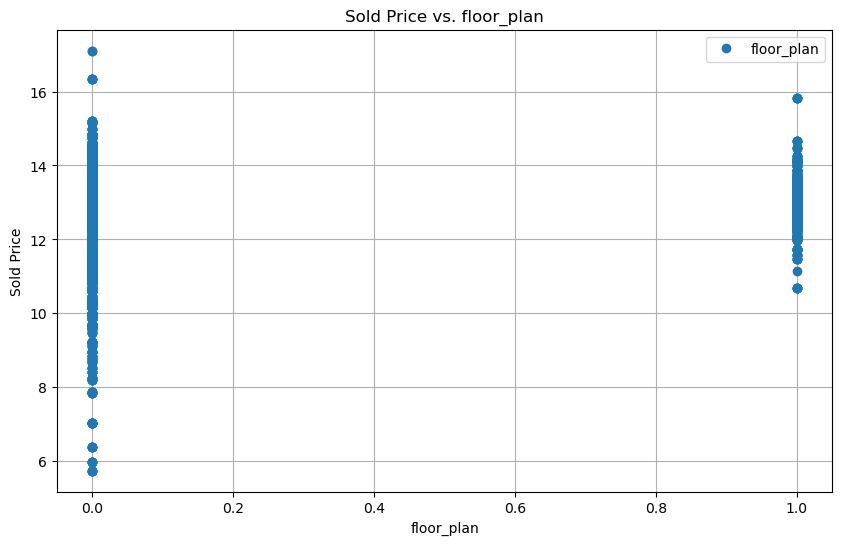

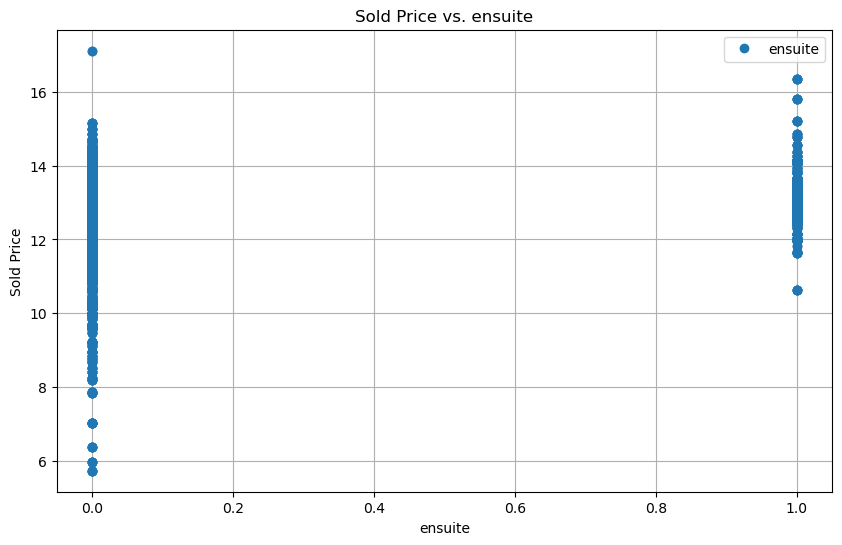

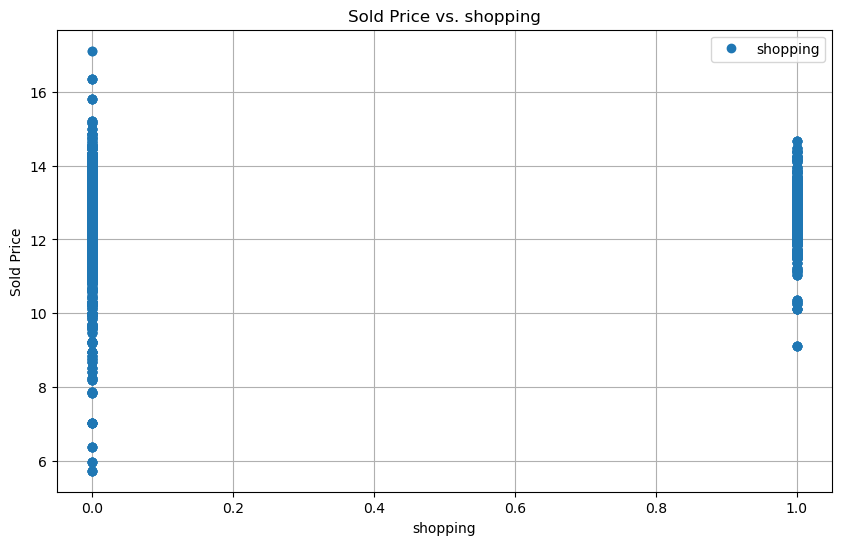

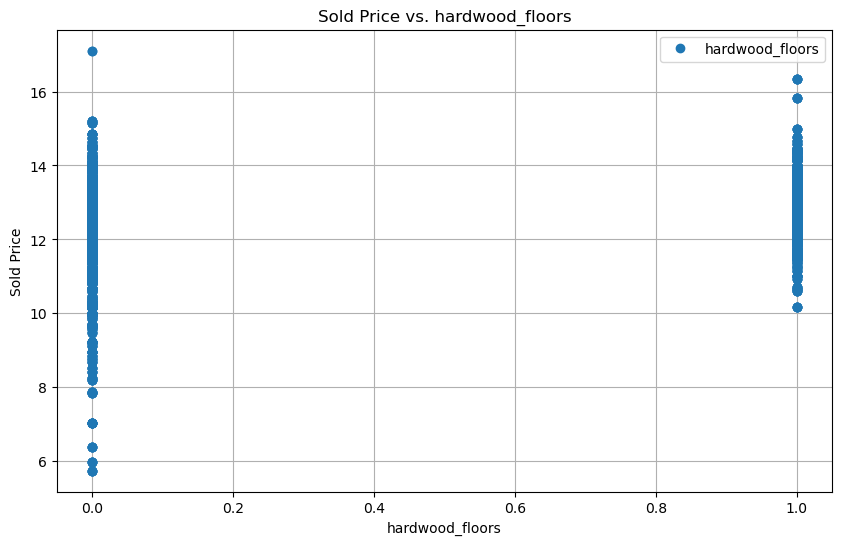

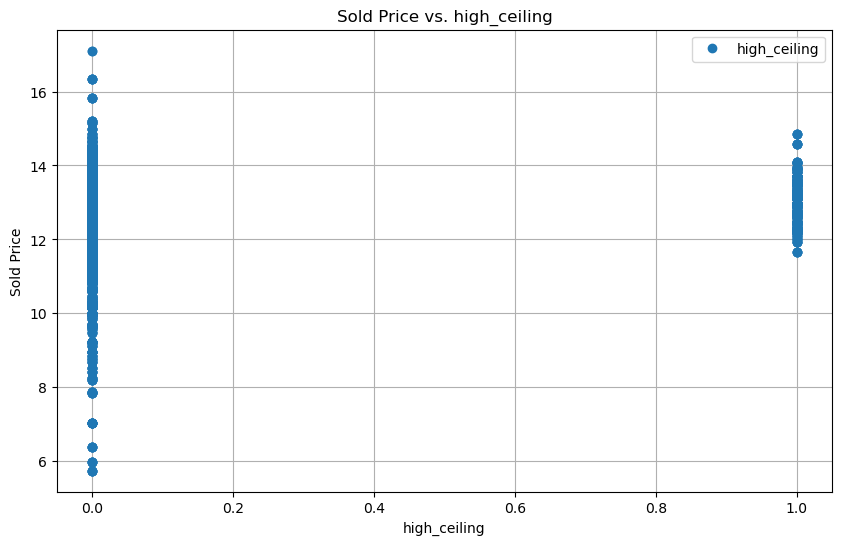

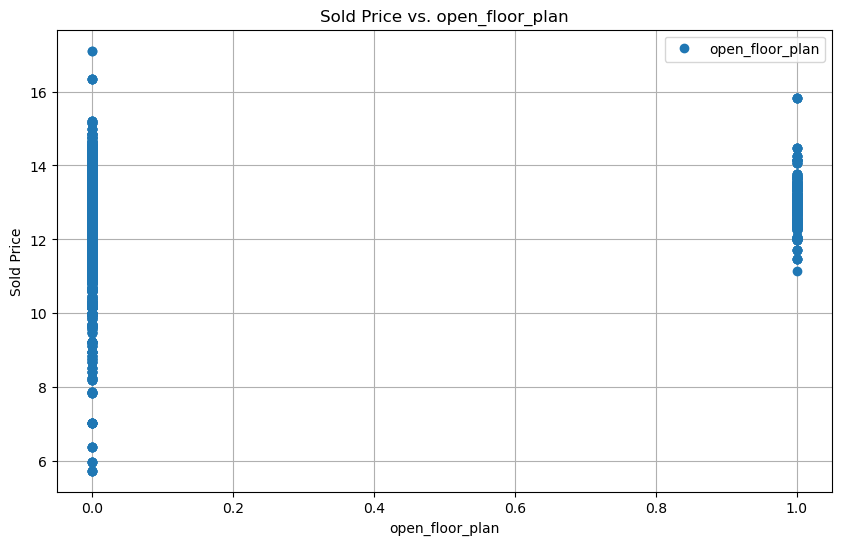

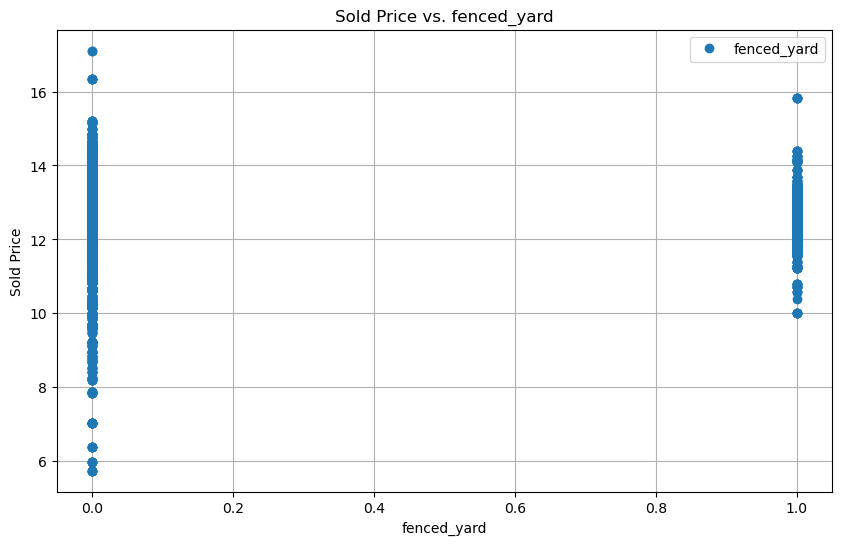

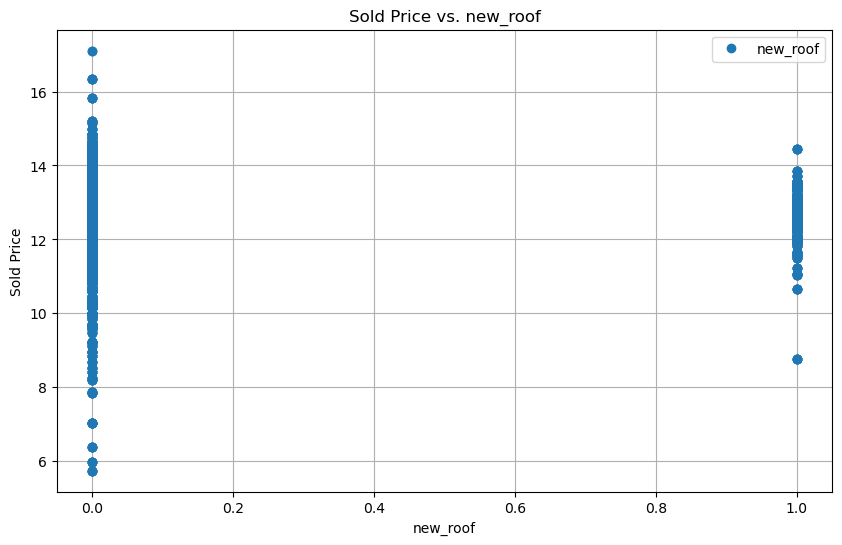

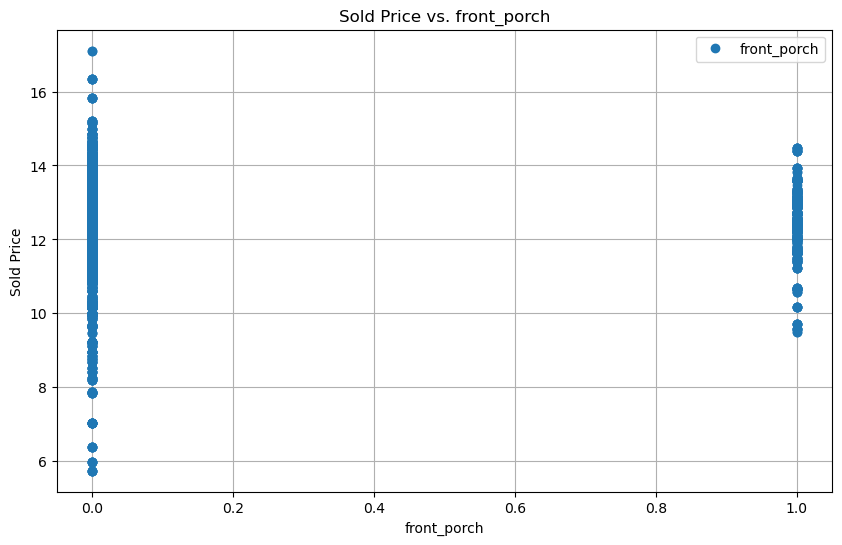

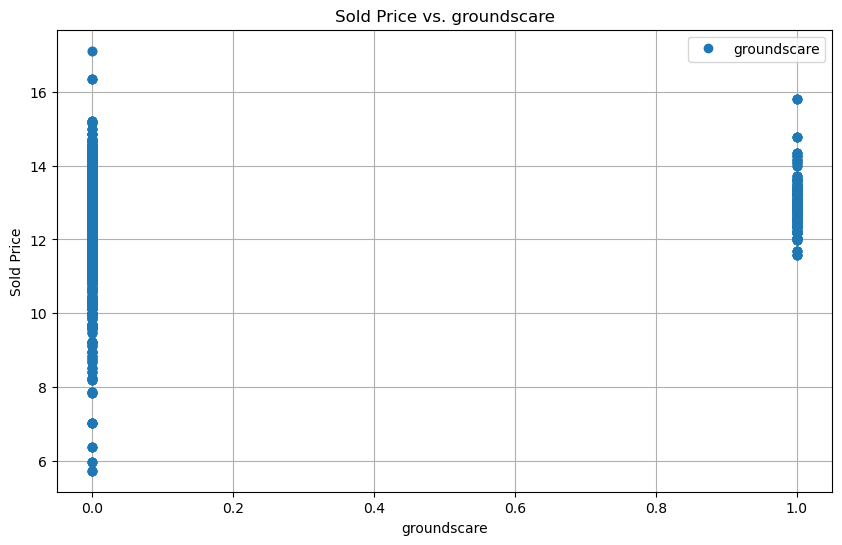

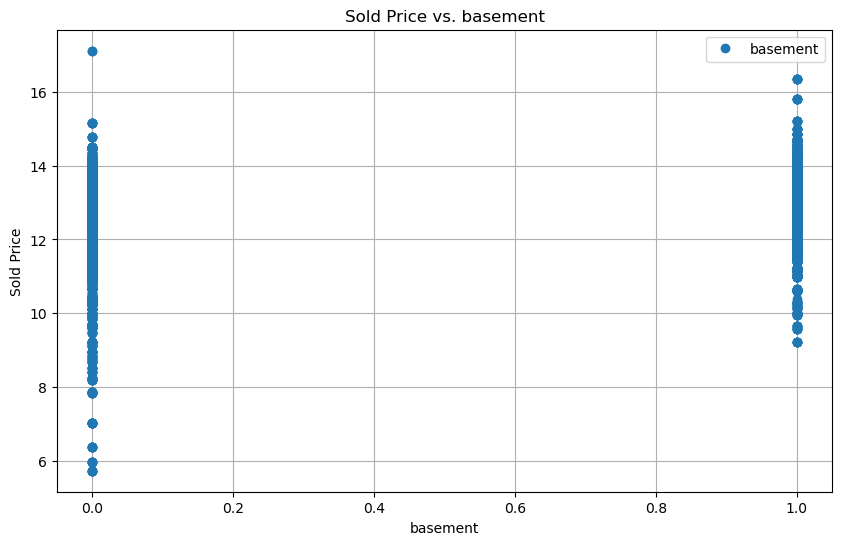

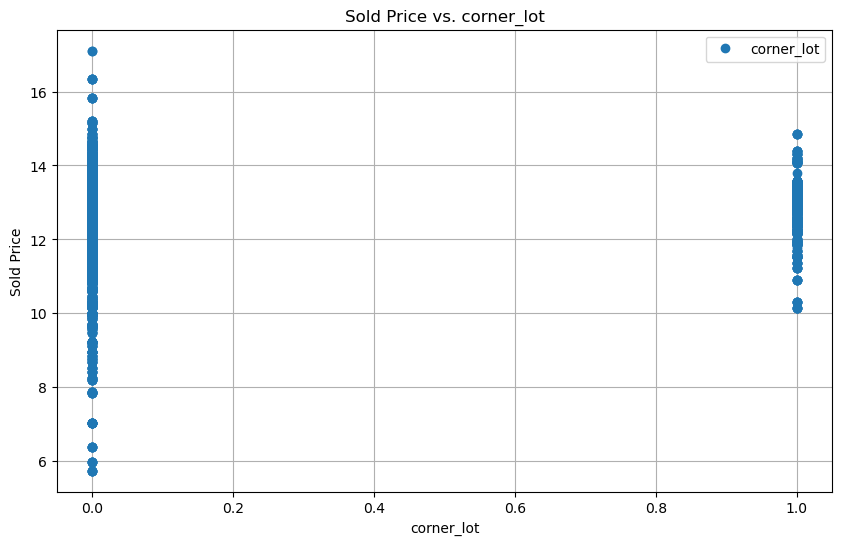

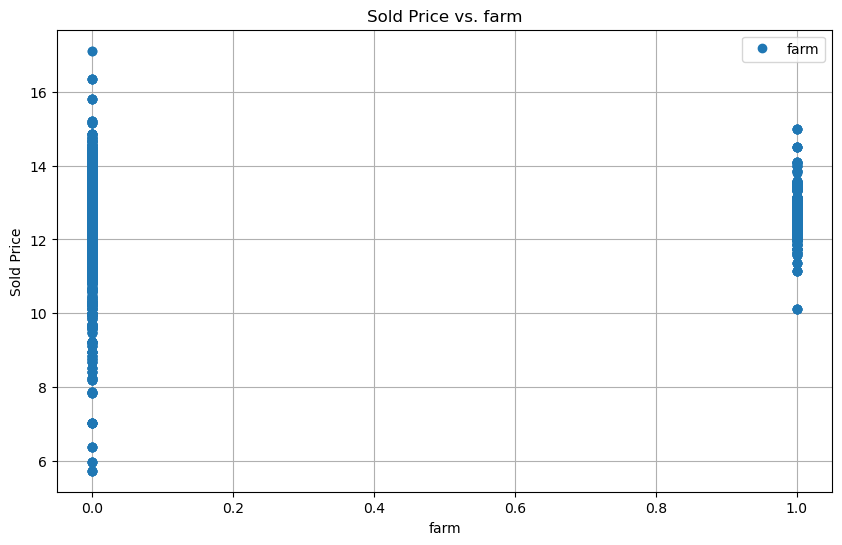

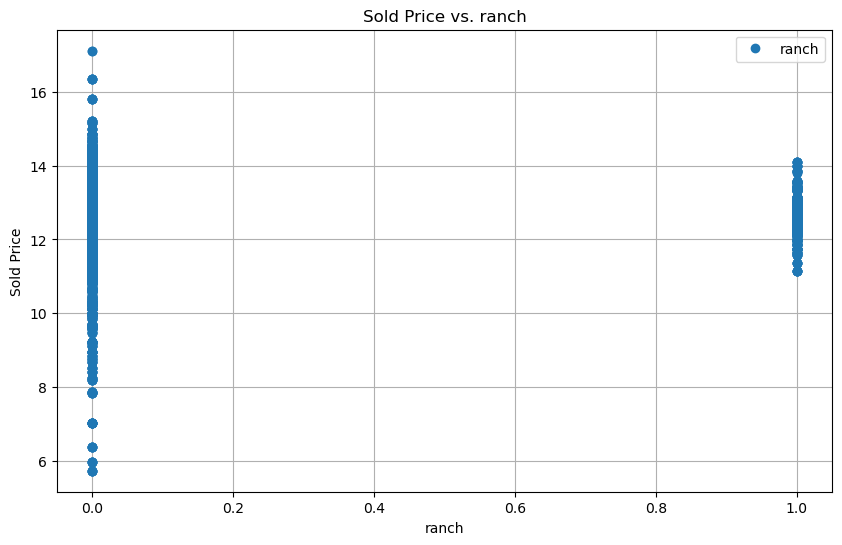

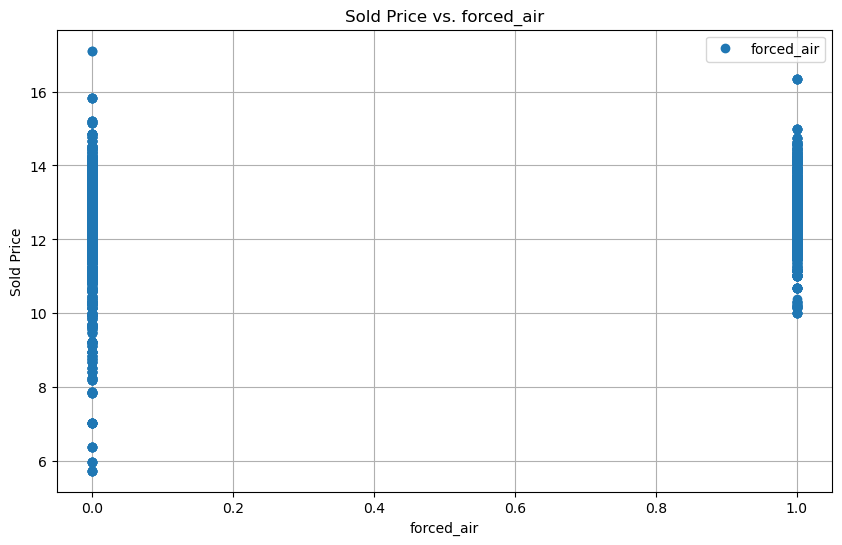

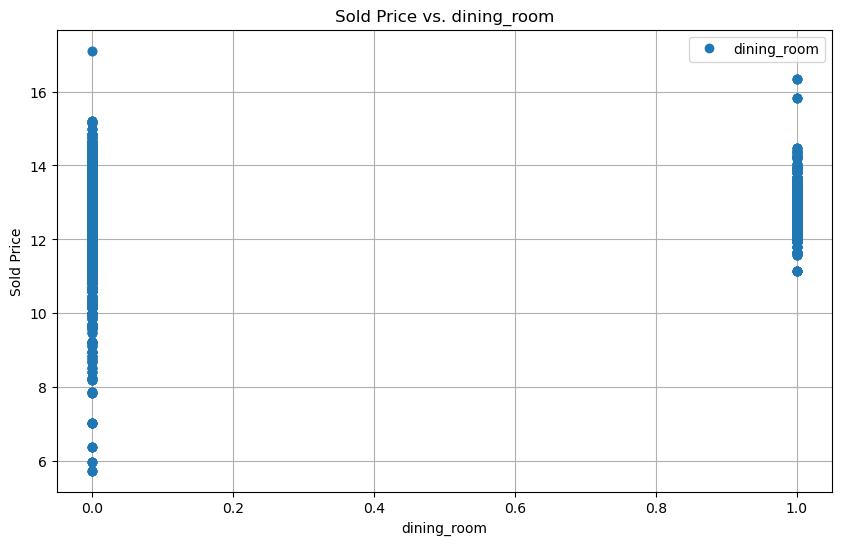

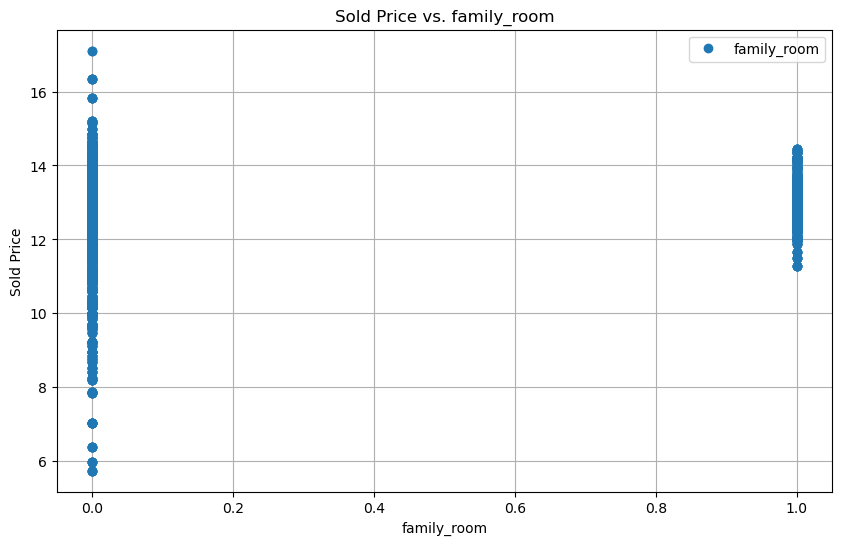

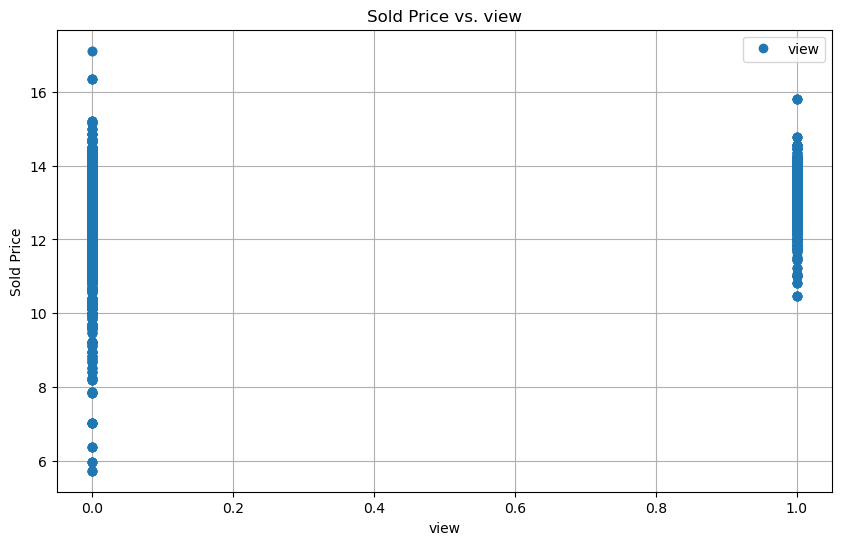

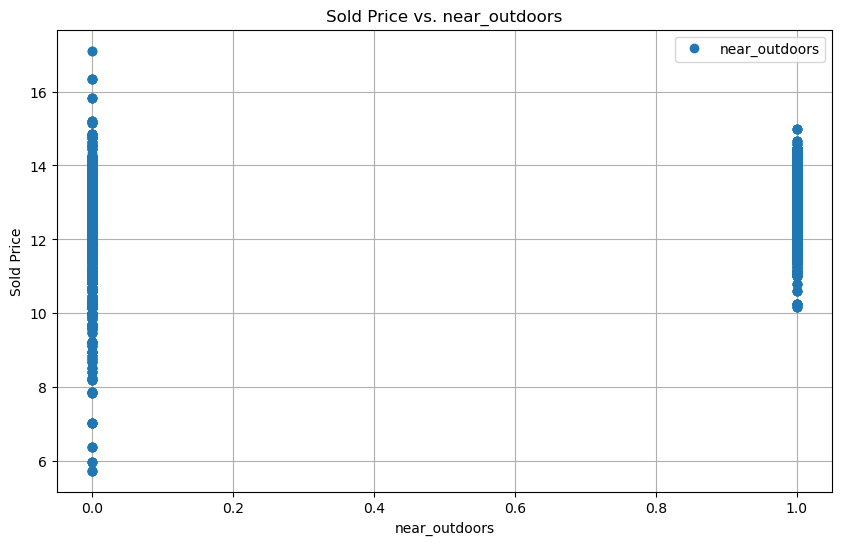

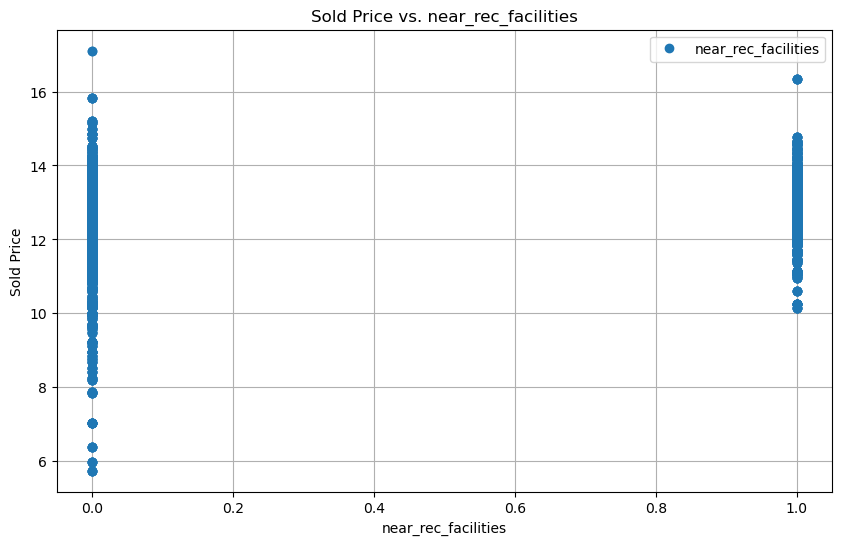

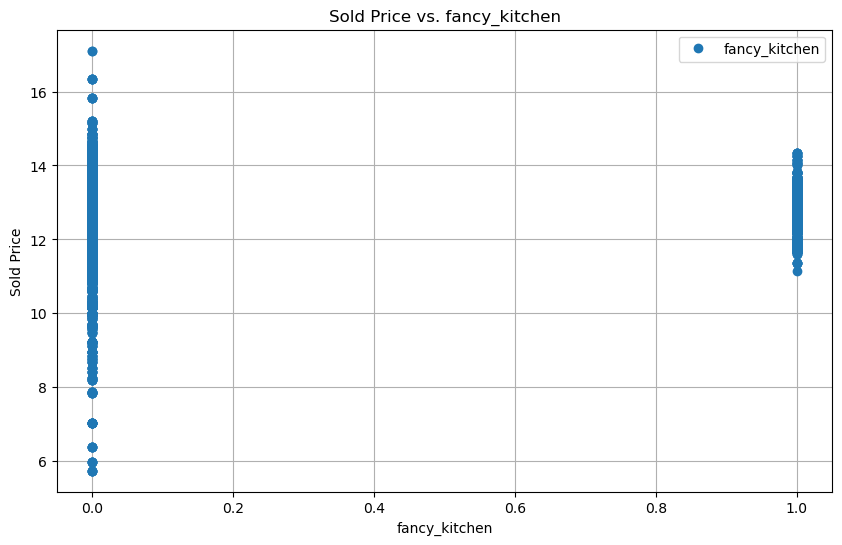

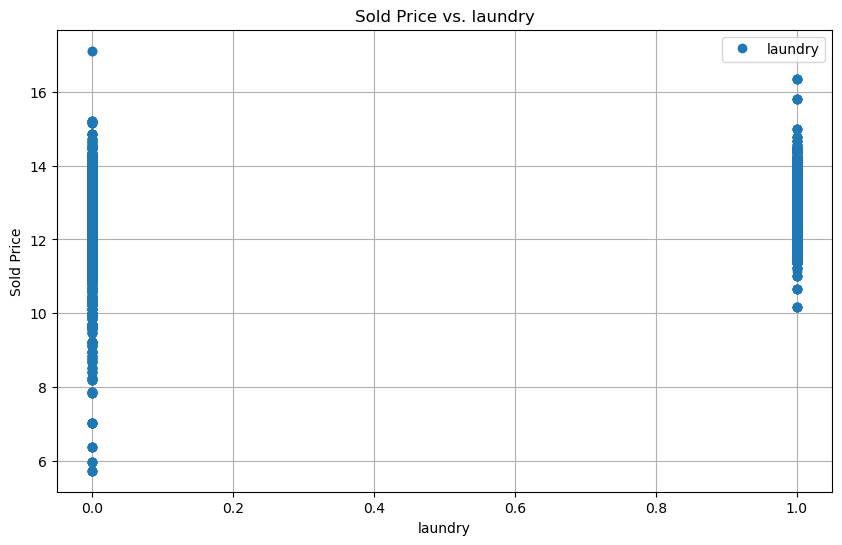

In [40]:
#looping through the numeric columns to create a line chart
for column in numeric_columns: 
    x_data = df[column]

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, sold_price, marker='o', linestyle='', label=f'{column}')
    plt.title(f'Sold Price vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Sold Price')
    plt.legend()
    plt.grid(True)
    plt.show()